In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats.stats import pearsonr   
import seaborn as sns
import copy
import platform
import warnings
warnings.filterwarnings('ignore')

/var/folders/kj/t7m_m14n2y3dhy3qhzdflb580000gn/T/ipykernel_48547/35656377.py:7: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
# Get the operating system name
os_name = platform.system()
# Check if it's macOS or Windows
if os_name == "Darwin":
    os = "mac"
elif os_name == "Windows":
    os = 'Windows'
else:
    os = os_name
    print(f"You are using {os_name}.")
print(os_name)

Darwin


In [3]:
if os == "mac":
    filepath = r'/Users/macbookpro15touchbar/Library/CloudStorage/OneDrive-Personal/Docs Sync/Jobs And Money/Careers/Study/Uni/USyd/2024S2/PSYC3914/PSYC3914 Assessments/Research Assignment/PSYC3914 Project Data Class.csv'
if os == "Windows":
    filepath = r'E:\oDrive\OneDrive\Docs Sync\Jobs And Money\Careers\Study\Uni\USyd\2024S2\PSYC3914\PSYC3914 Assessments\Research Assignment\\PSYC3914 Project Data Class.csv'
df = pd.read_csv(filepath)

# Some small changes made to the data
# Inconsistencies in gender harmonised (M/F/Male/Female/male/female) 
# 3+ languages spoken recoded to 3
# "Which language/s are you fluent in?" broken up in to separate data columns

In [4]:
#Tiktok
df = df.rename(columns={'How many hours per day do you spend on short video content (e.g. TikTok) on average?': 'tiktok'})
df = df.rename(columns={'Consider your use of short form video content (e.g. TikTok, Instagram Reels, Youtube Shorts). Approximately how long have you been using these platforms in MONTHS?': 'tiktok_time'})
df = df.rename(columns={'Do you consume short form content more often than you wish to?': 'tiktok_addict'})
df = df.rename(columns={'How many hours per day do you spend on your mobile phone? ': 'phone_time'})

In [5]:
#Speed
df = df.rename(columns={'Consider your engagement in watching recorded lectures. Do you increase the speed of these videos (e.g. to 1.25x, 1.5x, 2x speed)?': 'speed'})

In [6]:
# Games
df = df.rename(columns={'Do you play chess?': 'chess'})
df = df.rename(columns={'How many hours do you spend playing video games per day?': 'vgames'})

In [7]:
# Stress, calming
df = df.rename(columns={'On a scale of 0-10, how stressed did you feel on the day/s you completed these tests?': 'stress'})
df = df.rename(columns={'How often do you use specific techniques (such as journaling, deep breathing, or talking to someone) to regulate your emotions?': 'emotion_reg'})
df = df.rename(columns={'Before beginning each TMB test, did you take at least 10 seconds to steady your thoughts or breathing?': 'preparation'})

In [8]:
#Music
df = df.rename(columns={'On average, how many hours of music do you listen to per day?': 'music'})
df = df.rename(columns={'Would you say you prefer the aesthetic qualities (e.g. pleasing to listen to, energising/relaxing) or thematic qualities (e.g. lyrical meaning, emotional experience) of music?': 'music_type'})
df = df.rename(columns={'How many genres of music do you listen to?': 'music_num_genres'})
df = df.rename(columns={'Do you currently play any musical instruments?': 'music_play_instr'})
#Reading
df = df.rename(columns={'How many hours do you spend reading non-university related texts/novels per week?': 'reading'})

In [9]:
#Enjoyment
df = df.rename(columns={'How much did you enjoy doing the Matrix Reasoning task?    Recall that the task required you to select the shape that best completes the pattern.': 'enjoy_matrix'})

In [10]:
#Openness, creative
df = df.rename(columns={'Do you like trying new experiences, even if you do not know how they will turn out?': 'new_experiences'})
df = df.rename(columns={'Do you see yourself as a creative person?': 'creative'})

In [11]:
#Exercise
df = df.rename(columns={'How many hours do you engage in physical activity per week?': 'exercise_hours'})
df = df.rename(columns={'How would you rate your lifestyle in terms of physical activity?': 'exercise_rating'})
#Sleep
df = df.rename(columns={'On average, how many hours of sleep do you get per night?': 'sleep_hours'})
df = df.rename(columns={'How would you rate your sleep quality overall?': 'sleep_quality'})

#Mood
df = df.rename(columns={'Rate your mood at the time of completing these tests  ': 'mood'})

In [12]:
#Languages
df = df.rename(columns={'Is English your first language?': 'languages_eng_1st'})
df = df.rename(columns={'How many languages do you speak?': 'languages_num'})
df = df.rename(columns={'What is the language you are second-most confident with?': 'languages_second'})
#df = df.rename(columns={'Which language/s are you fluent in?': 'languages_fluent'})

In [13]:
#Demography
df = df.rename(columns={'How many siblings do you have?': 'siblings'})

In [14]:
df_recoded = copy.deepcopy(df)

In [15]:
df.columns.values

array(['Participant ID', 'TMB Simple Reaction Time',
       'TMB Choice Reaction Time',
       'TMB Multiracial Reading the Mind in the Eyes',
       'TMB Matrix Reasoning', 'TMB Digit Symbol Matching',
       'TMB Verbal Paired Associates Memory - Test',
       'TMB Visual Paired Associates Memory - Test',
       'TMB Cambridge Face Memory Test', 'TMB Vocabulary',
       'TMB Multiracial Emotion Identification',
       'TMB Gradual Onset Continuous Performance Test',
       'TMB Forward Digit Span', 'TMB Backward Digit Span',
       'TMB Trail-Making (A)', 'TMB Trail-Making (B)',
       'TMB Multiple Object Tracking', 'TMB Paced Serial Addition',
       'Age (years)', 'Gender ', 'Handedness ', 'siblings',
       'languages_eng_1st', 'languages_num', 'languages_second',
       'How would you rate your overall proficiency in this second language, including speaking, reading, and writing? ',
       'Which language/s are you fluent in?', 'sleep_hours',
       'sleep_quality', 'exercise_ho

In [16]:

#Recodings
df_recoded = copy.deepcopy(df)
df_recoded['languages_num'] = df_recoded['languages_num'].replace("1 (English only)", '1') #
df_recoded['languages_num'] = df_recoded['languages_num'].replace("3+", '3')

df_recoded['speed'][(df['speed'] == "No")] = 0
df_recoded['speed'][(df['speed'] == "Yes")] = 1

df_recoded['Gender '][(df['Gender '] == "Female")] = 0
df_recoded['Gender '][(df['Gender '] == "Genderqueer")] = 0.5 #####
df_recoded['Gender '][(df['Gender '] == "Male")] = 1
df_recoded['Handedness '][(df['Handedness '] == "Left")] = 0
df_recoded['Handedness '][(df['Handedness '] == "Ambidextrous")] = 0.5 ######
df_recoded['Handedness '][(df['Handedness '] == "Right")] = 1

df_recoded['preparation'][(df_recoded['preparation'] == "No")] = 0
df_recoded['preparation'][(df_recoded['preparation'] == "Yes")] = 1

## Chess
# Binary measure (play chess: yes/no)
df_recoded['chess_any'] = df['chess']
df_recoded['chess_any'][(df_recoded['chess'] == "Yes, occasionally") | (df_recoded['chess'] == "Yes, often")] = 1
df_recoded['chess_any'][(df_recoded['chess'] == "No")] = 0
# Continuous measure
df_recoded['chess_graded'] = df['chess']
df_recoded['chess_graded'][(df_recoded['chess'] == "No")] = 0
df_recoded['chess_graded'][(df_recoded['chess'] == "Yes, occasionally")] = 1
df_recoded['chess_graded'][(df_recoded['chess'] == "Yes, often")] = 2


df_recoded['emotion_reg'][(df_recoded['emotion_reg'] == "Never")] = 0
df_recoded['emotion_reg'][(df_recoded['emotion_reg'] == "Sometimes")] = 1
df_recoded['emotion_reg'][(df_recoded['emotion_reg'] == "Always")] = 2

df_recoded['languages_eng_1st'][(df['languages_eng_1st'] == "No")] = 0
df_recoded['languages_eng_1st'][(df['languages_eng_1st'] == "Yes")] = 1
df_recoded['music_play_instr'][(df['music_play_instr'] == "No, never")] = 0
df_recoded['music_play_instr'][(df['music_play_instr'] == "No, but did in past")] = 1
df_recoded['music_play_instr'][(df['music_play_instr'] == "Yes, leisurely")] = 2
df_recoded['music_play_instr'][(df['music_play_instr'] == "Yes, professionally")] = 3
df_recoded['music_num_genres'][(df['music_num_genres'] == "4+")] = 4
df_recoded['music_type'][(df['music_type'] == "Aesthetic")] = 0
df_recoded['music_type'][(df['music_type'] == "Thematic")] = 1
df_recoded['tiktok_addict'][(df['tiktok_addict'] == "No")] = 0
df_recoded['tiktok_addict'][(df['tiktok_addict'] == "Yes")] = 1

df_recoded['new_experiences'][(df['new_experiences'] == "No")] = 0
df_recoded['new_experiences'][(df['new_experiences'] == "Yes")] = 1
df_recoded['creative'][(df['creative'] == "No")] = 0
df_recoded['creative'][(df['creative'] == "Yes")] = 1

In [17]:
## Combination variables # composite # combined
df_recoded['tiktok_cumulative'] = df_recoded["tiktok_time"]*df_recoded['tiktok']
df_recoded['sleep_overall'] = df_recoded['sleep_hours']*df_recoded['sleep_quality']
df_recoded['digit_span'] = df_recoded['TMB Forward Digit Span']+df_recoded['TMB Backward Digit Span']
df_recoded['multiracial'] = df_recoded['TMB Multiracial Emotion Identification'] + df_recoded['TMB Multiracial Reading the Mind in the Eyes']
df_recoded['trail_making_avg'] = (df_recoded['TMB Trail-Making (A)'] + df_recoded['TMB Trail-Making (B)'])*0.5

#WAIS-IV uses these
iq_variables = ['digit_span', # 'TMB Forward Digit Span', 'TMB Backward Digit Span'
                'TMB Matrix Reasoning',
                #'TMB Vocabulary',
                'TMB Verbal Paired Associates Memory - Test','TMB Visual Paired Associates Memory - Test',
                'trail_making_avg', #'TMB Trail-Making (A)','TMB Trail-Making (B)',
                'TMB Paced Serial Addition'
               ]


## Weighting
# Make all IQ variables count the same
sum_ = 0
for var in iq_variables:
    sum_+= df_recoded[var].sum()
avg_ = sum_ / len(iq_variables)

#Make all TMB variables count the same
sum_all = 0
p = 0
for var in df_recoded.columns.values:
    if "TMB" in var:
        sum_all+= df_recoded[var].sum()
        p+=1
avg_all = sum_all / p

df_recoded['iq'] = 0.0
df_recoded['iq_equalweight'] = 0.0
df_recoded['iq_normalised'] = 0.0
for var in iq_variables:
    ## Method to use normalised scores
    array = df_recoded[var]
    df_recoded[var+"_normalised"] = array

    mean = np.nanmean(df_recoded[var])
    std = np.nanstd(df_recoded[var])
    # Normalize the array (convert to z-scores), while ignoring NaNs
    normalized_array = (array - mean) / std
    df_recoded[var+"_normalised"] = normalized_array
    # Calculagte stdev diff
    df_recoded['iq_normalised'] = df_recoded['iq_normalised'] + df_recoded[var+"_normalised"]    
    
    ## Method to use average
    df_recoded['iq'] = df_recoded['iq'] + df_recoded[var]
    df_recoded[var+"_equal"] = df_recoded[var]*(avg_/df_recoded[var].sum())
    df_recoded['iq_equalweight'] = df_recoded['iq_equalweight'] + df_recoded[var+"_equal"]

for var in iq_variables:    
    del_cols = ["iq",'iq_equalweight',var+"_equal",var+"_normalised"]
    df_recoded = df_recoded.drop(del_cols, axis=1, errors='ignore')

# Take average normalised score
df_recoded['iq_normalised'] = df_recoded['iq_normalised'] / len(iq_variables) 


# Use ALL TMB variables to contribute to IQ calculation
# df_recoded['iq_tmb_all'] = 0.0
# df_recoded['iq_tmb_equalweight'] = 0.0
# for var in df_recoded.columns.values:
#     if "TMB" in var:
#         df_recoded[var+"_tmb_equal"] = df_recoded[var]*(avg_all/df_recoded[var].sum())
#         df_recoded['iq_tmb_all'] = df_recoded['iq_tmb_all'] + df_recoded[var]        
#         df_recoded['iq_tmb_equalweight'] = df_recoded['iq_tmb_all'] + df_recoded[var+'_tmb_equal']

In [18]:
#df_recoded[['iq','iq_equalweight',"iq_normalised"]].head(5)
df_recoded[["iq_normalised"]].head(5)

,iq_normalised
0,0.244941
1,-0.507687
2,0.223855
3,0.278761
4,0.462128


In [19]:
#Cols to delete
del_cols = ["languages_second",
            #"How would you rate your overall proficiency in this second language, including speaking, reading, and writing? ",
            "Which language/s are you fluent in?",
            "Unnamed: 25",
            "Unnamed: 27",
            "Unnamed: 28",
           ]

del_cols =  del_cols + ["Participant ID",
            "Age (years)",
             "Gender ",
             "Handedness ",
             "siblings"
            ]
df_recoded = df_recoded.drop(del_cols, axis=1, errors='ignore')

In [20]:
# Show frequency of responses for each question with a few categories
for col in df_recoded.columns.values:
    # Count the frequency of each value
    counted_data = Counter(df_recoded[col].values)
    num_results = len(counted_data)
    if num_results < 5:
        sorted_counted_data = counted_data.most_common()
        # Display the results
        print(col)
        for item, count in sorted_counted_data:
            print(f"{item}: {count}")
        print("\n")

languages_eng_1st
1: 29
0: 12


languages_num
1: 21
2: 12
3: 8


emotion_reg
1: 19
2: 13
0: 7
nan: 2


music_num_genres
4: 28
3: 7
2: 4
nan: 2


music_type
0: 22
1: 17
nan: 2


tiktok_addict
1: 31
0: 8
nan: 2


chess
No: 25
Yes, occasionally: 10
Yes, often: 4
nan: 2


new_experiences
1: 36
0: 3
nan: 2


creative
1: 27
0: 11
nan: 3


speed
1: 30
0: 9
nan: 2


preparation
0: 27
1: 12
nan: 2


chess_any
0: 25
1: 14
nan: 2


chess_graded
0: 25
1: 10
2: 4
nan: 2




In [21]:
### # Function to compute Pearson correlation and test for significance
def correlation_significance_test(x, y, alpha=0.05):
    # Calculate the Pearson correlation coefficient and the p-value
    mask = ~np.isnan(x) & ~np.isnan(y) 
    x_filtered = x[mask]
    y_filtered = y[mask]

    r, p_value = stats.pearsonr(x_filtered, y_filtered)
    
    # Determine if the correlation is significant based on the p-value
    if p_value < alpha:
        print(f"The correlation is statistically significant (r = {r:.2f}, p = {p_value:.3f}).")
    else:
        print(f"The correlation is not statistically significant (r = {r:.2f}, p = {p_value:.3f}).")
    
    return r, p_value


def plotter(xlabel,ylabel):
    plt.figure()
    x = df_recoded[xlabel]
    y = df_recoded[ylabel]

    mask = ~np.isnan(x) & ~np.isnan(y) 
    x_filtered = x[mask]
    y_filtered = y[mask]

    plt.scatter(x_filtered, y_filtered, color='blue', marker='o')
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Calculate the line of best fit
    coefficients = np.polyfit(x_filtered, y_filtered, 1)  # 1 indicates a linear fit
    poly = np.poly1d(coefficients)
    y_fit = poly(x_filtered)
    # Plot the line of best fit
    plt.plot(x_filtered, y_fit, color='red', linestyle='--')
    plt.title(ylabel+" vs "+str(xlabel))
    # Show the plot
    plt.show()




In [22]:
plotting = 0
# Plot the relationship between all the significant pairs, where one is the "find_var" argument
def plot_all(find_var):
    for elem in significant_pairs:
        try:
            if elem[0] == find_var or elem[1] == find_var:
                pass
            if elem[0] == find_var:
                print(elem[1], significant_pairs[elem])
                if plotting == 1:
                    plotter(elem[0],elem[1])
            elif elem[1] == find_var:
                print(elem[0], significant_pairs[elem])
                if plotting == 1:
                    plotter(elem[0],elem[1])
        except:
            print("Problem with :", elem[0], "and ", elem[1])
            
def is_array_numeric(arr):
    return np.issubdtype(arr.dtype, np.number)

In [23]:
for col in df_recoded.columns.values:
    try:
        df_recoded[col] = pd.to_numeric(df_recoded[col], errors='coerce')
    except:
        print("Error", col)
    #print(col,is_array_numeric(df_recoded[col].values),df_recoded[col].head(5))

In [24]:
# #Plot the distribution for each variable
# for col in df_recoded.columns.values:
#     try:
#         print(col)

#         # Sample data
#         data = df_recoded[col].values
    
#         plt.figure()
#         # Create a figure with subplots
#         fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
        
#         # Scatter plot
#         ax1.scatter(np.arange(len(data)), data, color='blue')
#         ax1.set_title('Scatter Plot of Data Points')
#         ax1.set_xlabel('Index')
#         ax1.set_ylabel('Value')
        
#         # Box plot
#         sns.boxplot(data=data, ax=ax2, color='lightgreen')
#         ax2.set_title('Box Plot of Data')
        
#         # Adjust layout for better visualization
#         plt.tight_layout()
        
#         # Show the plots
#         plt.show()
#     except:
#         print("Error with col", col)

In [25]:
# Replace erroneous user input data 

# Error values
df_recoded.loc[39, 'tiktok'] = np.nan # # someone said they spend 30 hours per day on tiktok! Maybe they meant per week but I'm just going to remove them
df_recoded.loc[39, 'tiktok_cumulative'] = np.nan # is altered by the above error since it's a multiple of it
#Inspect the data

# # People who don't use at all
# df_recoded.loc[2, 'tiktok'] = np.nan
# df_recoded.loc[19, 'tiktok'] = np.nan
# df_recoded.loc[25, 'tiktok'] = np.nan
# # High users
# df_recoded.loc[21, 'tiktok'] = np.nan
# df_recoded.loc[28, 'tiktok'] = np.nan
# df_recoded.loc[29, 'tiktok'] = np.nan
# df_recoded.loc[36, 'tiktok'] = np.nan


#Then remove the biggest outlier
# df_recoded.loc[26, 'tiktok'] = np.nan # 4 # 4 hours/day??
#df1.loc[26, "TMB Forward Digit Span"] = np.nan # 7


df_recoded.loc[30, 'TMB Simple Reaction Time'] = np.nan # Implausibly low reaction time
# Scores above the maximum possible, no obvious data entry error that I can correct
df_recoded.loc[18, 'TMB Verbal Paired Associates Memory - Test'] = np.nan
df_recoded.loc[30, 'TMB Verbal Paired Associates Memory - Test'] = np.nan
df_recoded.loc[6, 'TMB Visual Paired Associates Memory - Test'] = np.nan
df_recoded.loc[25, 'TMB Visual Paired Associates Memory - Test'] = np.nan
df_recoded.loc[22, 'music'] = np.nan # Does not listen to 20hrs of  music per day

In [26]:
# Hypothesis 1
# We expect a negative correlation between time watching videos and each of the following:
# Digit Span (both Forward Digit Span, and Backward Digit Span)
### Tiktok variable to use for analyses
tiktok_var_to_use_dct = {1: 'tiktok', 2: 'tiktok_time', 3: 'tiktok_cumulative', 4: "tiktok_addict"}
tiktok_var_to_use = tiktok_var_to_use_dct[1]
if tiktok_var_to_use == 'tiktok':  
    des = 'tiktok usage (hrs/day)' 
    ttl = 'tiktok usage'
elif tiktok_var_to_use == 'tiktok_time':
    des = 'tiktok usage duration (months)'
    ttl = 'tiktok usage'
elif tiktok_var_to_use == 'tiktok_cumulative':
    des = 'cumultative tiktok usage (~month-hours)'
    ttl = 'tiktok usage'
elif tiktok_var_to_use == 'tiktok_addict':
    des = 'tiktok addict status'
    ttl = 'tiktok addiction'    
print(des)

tiktok usage (hrs/day)


In [27]:
#Preview 
df1 = df_recoded[["tiktok","tiktok_time","tiktok_cumulative","tiktok_addict","TMB Forward Digit Span","TMB Backward Digit Span","digit_span","stress"]]
df1_corr = df1.corr()
df1_corr.round(2)

,tiktok,tiktok_time,tiktok_cumulative,tiktok_addict,TMB Forward Digit Span,TMB Backward Digit Span,digit_span,stress
tiktok,1.00,0.55,0.84,0.49,-0.22,-0.01,-0.12,0.01
tiktok_time,0.55,1.00,0.83,0.43,-0.23,-0.28,-0.29,-0.24
tiktok_cumulative,0.84,0.83,1.00,0.40,-0.26,-0.12,-0.21,-0.16
tiktok_addict,0.49,0.43,0.40,1.00,0.08,-0.03,0.02,-0.12
TMB Forward Digit Span,-0.22,-0.23,-0.26,0.08,1.00,0.56,0.87,0.02
TMB Backward Digit Span,-0.01,-0.28,-0.12,-0.03,0.56,1.00,0.90,0.07
digit_span,-0.12,-0.29,-0.21,0.02,0.87,0.90,1.00,0.05
stress,0.01,-0.24,-0.16,-0.12,0.02,0.07,0.05,1.00


In [28]:
# Do those who report consuming more short video content than they wish to consume more?
df_addict_no = df1[df1['tiktok_addict'] == 0]
addict_no = df_addict_no[tiktok_var_to_use].values
df_addict_yes = df1[df1['tiktok_addict'] == 1]
addict_yes = df_addict_yes[tiktok_var_to_use].values

mask = ~np.isnan(addict_no)
addict_no = addict_no[mask]
mask = ~np.isnan(addict_yes)
addict_yes = addict_yes[mask]


# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(addict_no, addict_yes, equal_var=False)  # Set equal_var=False for Welch's t-test


# Calculate variances and sample sizes
s1_squared = np.var(addict_no, ddof=1)
s2_squared = np.var(addict_yes, ddof=1)
n1 = len(addict_no)
n2 = len(addict_yes)

# Calculate Welch-Satterthwaite degrees of freedom
df = ((s1_squared/n1 + s2_squared/n2)**2) / ((s1_squared**2 / ((n1**2) * (n1-1))) + (s2_squared**2 / ((n2**2) * (n2-1))))

# Output the results
print(f"T-statistic: {t_statistic}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value}")


    
# Compute the standard deviation (sample)
std_dev = np.std(addict_no, ddof=1)  # ddof=1 for sample standard deviation
# Compute the sample size
n2 = len(addict_no)
# Compute the standard error
standard_error_nonaddict = std_dev / np.sqrt(n2)

# Compute the standard deviation (sample)
std_dev = np.std(addict_yes, ddof=1)  # ddof=1 for sample standard deviation
# Compute the sample size
n2 = len(addict_yes)
# Compute the standard error
standard_error_addict = std_dev / np.sqrt(n2)

print("mean, std_error for non-addicts: ", np.mean(addict_no),standard_error_nonaddict)
print("mean, std_error for addicts: ", np.mean(addict_yes),standard_error_addict)

T-statistic: -5.598989655305319
Degrees of freedom: 33.4725480171307
P-value: 3.0064810785410657e-06
mean, std_error for non-addicts:  0.39375 0.1174268389253496
mean, std_error for addicts:  1.5877766666666666 0.17801603503154567


In [29]:
# Sample data for x and y
x = df1["TMB Forward Digit Span"]
y = df1["TMB Backward Digit Span"]
z = df1[tiktok_var_to_use]

[0.61977624 1.58802238]


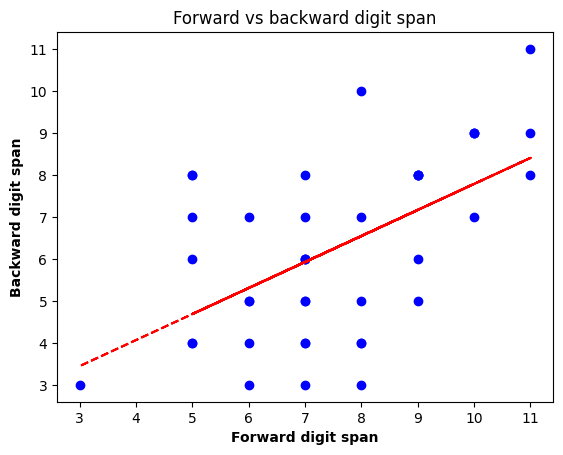

The correlation is statistically significant (r = 0.56, p = 0.000).


(0.5600310289619123, 0.0001404271000425641)

In [30]:
# Create a plot
# Filter out NaN values from both x and y
mask = ~np.isnan(x) & ~np.isnan(y) 
x_filtered = x[mask]
y_filtered = y[mask]

plt.figure()
plt.scatter(x_filtered, y_filtered, color='blue', marker='o')
# Add labels and title
plt.xlabel('Forward digit span', fontweight='bold')
plt.ylabel('Backward digit span', fontweight='bold')
# Calculate the line of best fit
coefficients = np.polyfit(x_filtered, y_filtered, 1)  # 1 indicates a linear fit
print(coefficients)
poly = np.poly1d(coefficients)#(x)
y_fit = poly(x_filtered)
# Plot the line of best fit
plt.plot(x_filtered, y_fit, color='red', linestyle='--')
plt.title('Forward vs backward digit span')
# Show the plot
plt.show()


# Example: enter your two arrays
x_ = np.array(x_filtered)
y_ = np.array(y_filtered)
# Perform the significance test
correlation_significance_test(x_, y_)

In [31]:
# Is digit span different in low vs high stress individuals?
# Calculate the xth percentile of the specified column
low = 0.25
high = 1 - low
percentile_low = df1['stress'].quantile(low)
percentile_high = df1['stress'].quantile(high)
# Filter the DataFrame for rows where the column's value is in the top 25th percentile
filtered_lowstress = df1[df1['stress'] <= percentile_low]
filtered_lowstress_digitspans = filtered_lowstress["TMB Forward Digit Span"].values
filtered_highstress = df1[df1['stress'] >= percentile_high]
filtered_highstress_digitspans = filtered_highstress["TMB Forward Digit Span"].values
# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(filtered_lowstress_digitspans, filtered_highstress_digitspans, equal_var=False)  # Set equal_var=False for Welch's t-test

# Output the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
# Calculate sample variances
s1_squared = np.var(filtered_lowstress_digitspans, ddof=1)
s2_squared = np.var(filtered_highstress_digitspans, ddof=1)
n1 = len(filtered_lowstress_digitspans)
n2 = len(filtered_highstress_digitspans)
# Calculate degrees of freedom for Welch's t-test
dof = ((s1_squared / n1) + (s2_squared / n2))**2 / \
     (((s1_squared / n1)**2 / (n1 - 1)) + ((s2_squared / n2)**2 / (n2 - 1)))
print(f"Degrees of Freedom: {dof}")

# Compute the standard deviation (sample)
std_dev = np.std(filtered_lowstress_digitspans, ddof=1)  # ddof=1 for sample standard deviation
# Compute the sample size
n2 = len(filtered_lowstress_digitspans)
# Compute the standard error
standard_error_lowstress = std_dev / np.sqrt(n2)

# Compute the standard deviation (sample)
std_dev = np.std(filtered_highstress_digitspans, ddof=1)  # ddof=1 for sample standard deviation
# Compute the sample size
n2 = len(filtered_highstress_digitspans)
# Compute the standard error
standard_error_highstress = std_dev / np.sqrt(n2)

print("mean, std_error for low stress forward digit span: ", np.mean(filtered_lowstress_digitspans),standard_error_lowstress)
print("mean, std_error for high stress forward digit span: ", np.mean(filtered_highstress_digitspans),standard_error_highstress)

T-statistic: -0.10745856927604464
P-value: 0.9160632946391896
Degrees of Freedom: 13.021064109063886
mean, std_error for low stress forward digit span:  7.2727272727272725 0.7872958216222169
mean, std_error for high stress forward digit span:  7.363636363636363 0.30962520665320725


[-0.1516  2.498 ]


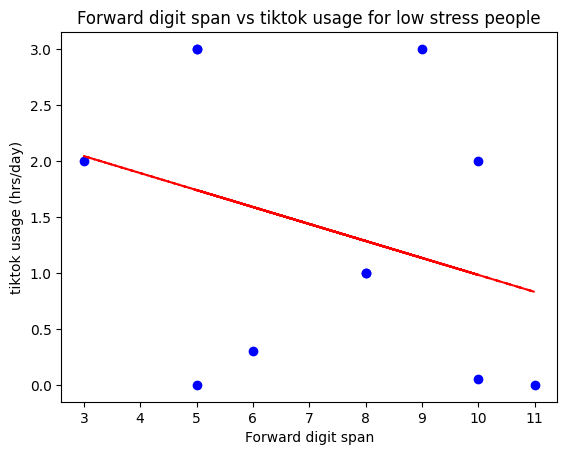

The correlation is not statistically significant (r = -0.32, p = 0.343).


(-0.31620410239076, 0.34347449962860205)

In [32]:
#Low stress individuals - correlation between digit span and tiktok usage
x_lowstress = filtered_lowstress["TMB Forward Digit Span"]
y_lowstress = filtered_lowstress["TMB Backward Digit Span"]
z_lowstress = filtered_lowstress[tiktok_var_to_use]

# Create a plot
# Filter out NaN values from both x and y
mask = ~np.isnan(x_lowstress) & ~np.isnan(z_lowstress) 
x_filtered_lowstress = x_lowstress[mask]
z_filtered_lowstress = z_lowstress[mask]

plt.figure()
plt.scatter(x_filtered_lowstress, z_filtered_lowstress, color='blue', marker='o')
# Add labels and title
plt.xlabel('Forward digit span')
plt.ylabel(des)
# Calculate the line of best fit
coefficients = np.polyfit(x_filtered_lowstress, z_filtered_lowstress, 1)  # 1 indicates a linear fit
print(coefficients)
poly = np.poly1d(coefficients)#(x)
z_fit = poly(x_filtered_lowstress)
# Plot the line of best fit
plt.plot(x_filtered_lowstress, z_fit, color='red', linestyle='--')
plt.title('Forward digit span vs '+ttl+" for low stress people")
# Show the plot
plt.show()

# Example: enter your two arrays
x_ = np.array(x_filtered_lowstress)
z_ = np.array(z_filtered_lowstress)
# Perform the significance test
correlation_significance_test(x_, z_)

[-0.28764569  3.3847819 ]


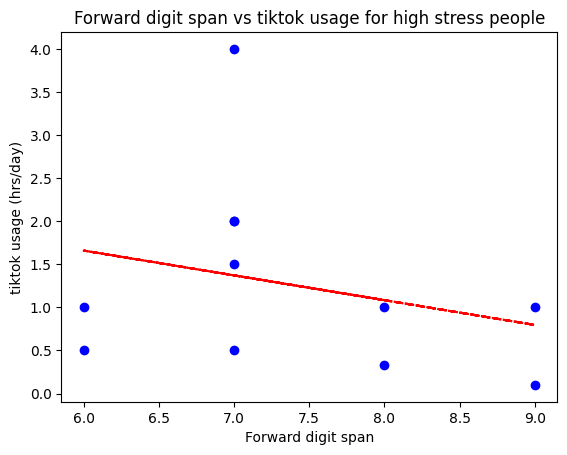

The correlation is not statistically significant (r = -0.27, p = 0.427).


(-0.26718638818617985, 0.42704017569265873)

In [33]:
# High stress individuals - correlation between digit span and tiktok usage
x_highstress = filtered_highstress["TMB Forward Digit Span"]
y_highstress = filtered_highstress["TMB Backward Digit Span"]
z_highstress = filtered_highstress[tiktok_var_to_use]

# Create a plot
# Filter out NaN values from both x and y
mask = ~np.isnan(x_highstress) & ~np.isnan(z_highstress) 
x_filtered_highstress = x_highstress[mask]
z_filtered_highstress = z_highstress[mask]

plt.figure()
plt.scatter(x_filtered_highstress, z_filtered_highstress, color='blue', marker='o')
# Add labels and title
plt.xlabel('Forward digit span')
plt.ylabel(des)
# Calculate the line of best fit
coefficients = np.polyfit(x_filtered_highstress, z_filtered_highstress, 1)  # 1 indicates a linear fit
print(coefficients)
poly = np.poly1d(coefficients)#(x)
z_fit = poly(x_filtered_highstress)
# Plot the line of best fit
plt.plot(x_filtered_highstress, z_fit, color='red', linestyle='--')
plt.title('Forward digit span vs '+ttl+" for high stress people")
# Show the plot
plt.show()

# Example: enter your two arrays
x_ = np.array(x_filtered_highstress)
z_ = np.array(z_filtered_highstress)
# Perform the significance test
correlation_significance_test(x_, z_)

In [34]:
t = df1[tiktok_var_to_use]

Variable to compare to tiktok use is:  TMB Forward Digit Span


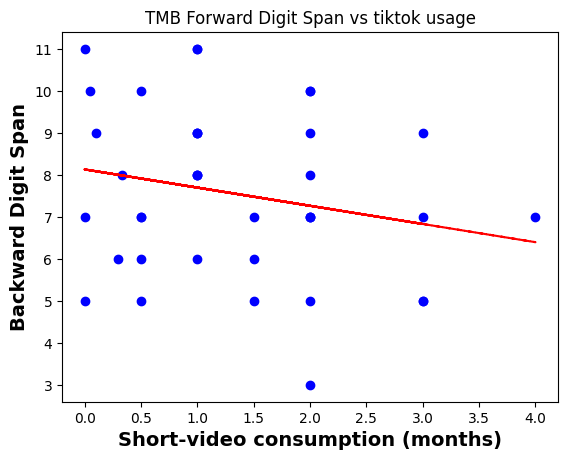

The correlation is not statistically significant (r = -0.22, p = 0.185).
Variable to compare to tiktok use is:  TMB Backward Digit Span


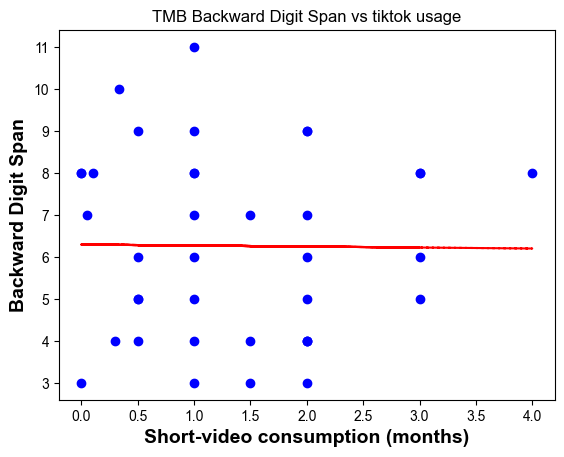

The correlation is not statistically significant (r = -0.01, p = 0.949).


In [35]:
for var in ["TMB Forward Digit Span","TMB Backward Digit Span"]:
    print("Variable to compare to tiktok use is: ", var)
    y = df1[var]
    # Create a plot
    # Filter out NaN values from both x and y
    mask = ~np.isnan(t) & ~np.isnan(y) 
    t_filtered = t[mask]
    y_filtered = y[mask]
    
    plt.figure()
    plt.scatter(t_filtered, y_filtered, color='blue', marker='o')
    mpl.rcParams['font.family'] = 'Arial'
    # Add labels and title
    #plt.xlabel(des)
    #plt.ylabel(var)
    plt.xlabel("Short-video consumption (months)", fontsize=14, color='black', fontweight='bold')  # X-axis label custom size and color
    plt.ylabel(var, fontsize=12, color='black', fontweight='bold', rotation=90)  # Y-axis label custom size and color and rotate vertically
    plt.ylabel("Backward Digit Span", fontsize=14, color='black', fontweight='bold', rotation=90)  # Y-axis label custom size and color and rotate vertically
    
    
    # Calculate the line of best fit
    coefficients = np.polyfit(t_filtered, y_filtered, 1)  # 1 indicates a linear fit
    poly = np.poly1d(coefficients)#(x)
    y_fit = poly(t_filtered)
    # Plot the line of best fit
    plt.plot(t_filtered, y_fit, color='red', linestyle='--')
    plt.title(var+" vs "+ttl)
    # Show the plot
    plt.show()
    
    # Example: enter your two arrays
    t_ = np.array(t_filtered)
    y_ = np.array(y_filtered)
    # Perform the significance test
    correlation_significance_test(t_, y_)

Variable to compare to tiktok use is:  TMB Forward Digit Span


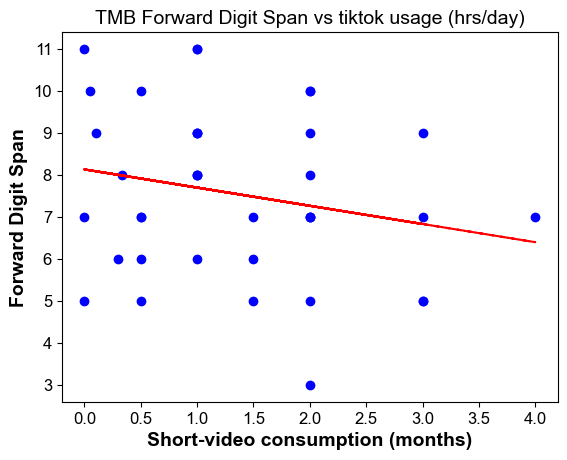

The correlation is not statistically significant (r = -0.22, p = 0.185).
Variable to compare to tiktok use is:  TMB Backward Digit Span


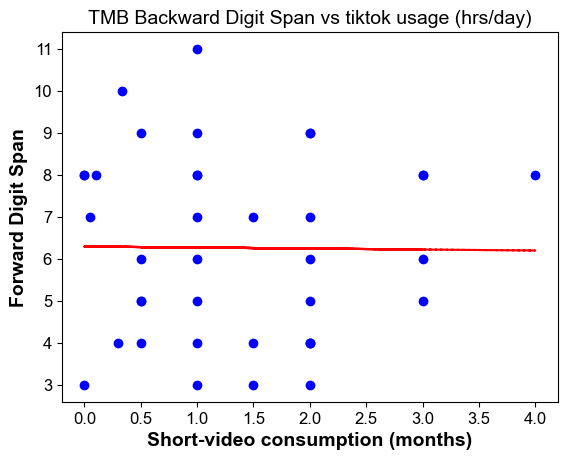

The correlation is not statistically significant (r = -0.01, p = 0.949).


In [36]:
for var in ["TMB Forward Digit Span","TMB Backward Digit Span"]:
    print("Variable to compare to tiktok use is: ", var)
    y = df1[var]
    # Create a plot
    # Filter out NaN values from both x and y
    mask = ~np.isnan(t) & ~np.isnan(y) 
    t_filtered = t[mask]
    y_filtered = y[mask]
    
    plt.figure()
    plt.scatter(t_filtered, y_filtered, color='blue', marker='o')
    # # Add labels and title
    # plt.xlabel(des)
    # plt.ylabel(var)
    # Calculate the line of best fit
    coefficients = np.polyfit(t_filtered, y_filtered, 1)  # 1 indicates a linear fit
    poly = np.poly1d(coefficients)#(x)
    y_fit = poly(t_filtered)
    # Plot the line of best fit
    plt.plot(t_filtered, y_fit, color='red', linestyle='--')
    # Show the plot
    mpl.rcParams['font.family'] = 'Arial'
    # Customizing the title, x-axis, and y-axis
    plt.title(var+" vs "+des, fontsize=14, color='black')  # Custom font size and jet black title
    #plt.title("Forward Digit Span"+" vs "+"short-video consumption", fontsize=14, color='black')  # Custom font size and jet black title
    plt.xlabel(des, fontsize=12, color='black')  # X-axis label custom size and color
    plt.xlabel("Short-video consumption (months)", fontsize=14, color='black', fontweight='bold')  # X-axis label custom size and color
    plt.ylabel(var, fontsize=12, color='black', rotation=90)  # Y-axis label custom size and color and rotate vertically
    plt.ylabel("Forward Digit Span", fontsize=14, color='black', fontweight='bold', rotation=90)  # Y-axis label custom size and color and rotate vertically
    
    # Customize the tick labels font size and color
    plt.tick_params(axis='x', labelsize=12, labelcolor='black')  # X-axis tick labels size and color
    plt.tick_params(axis='y', labelsize=12, labelcolor='black')  # Y-axis tick labels size and color
    plt.show()
    
    # Example: enter your two arrays
    t_ = np.array(t_filtered)
    y_ = np.array(y_filtered)
    # Perform the significance test
    correlation_significance_test(t_, y_)

Variable to compare to tiktok use is:  TMB Forward Digit Span


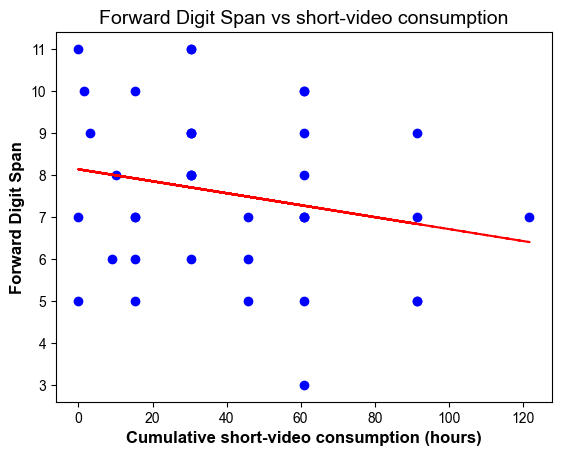

The correlation is not statistically significant (r = -0.22, p = 0.185).
Variable to compare to tiktok use is:  TMB Backward Digit Span


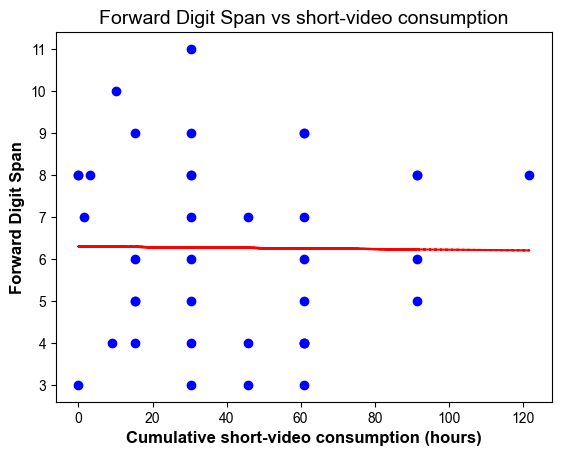

The correlation is not statistically significant (r = -0.01, p = 0.949).


In [37]:
for var in ["TMB Forward Digit Span","TMB Backward Digit Span"]:
    print("Variable to compare to tiktok use is: ", var)
    y = df1[var]
    # Create a plot
    # Filter out NaN values from both x and y
    mask = ~np.isnan(t) & ~np.isnan(y) 
    t_filtered = t[mask]*365.25/12
    y_filtered = y[mask]
    
    plt.figure()
    plt.scatter(t_filtered, y_filtered, color='blue', marker='o')
    # Calculate the line of best fit
    coefficients = np.polyfit(t_filtered, y_filtered, 1)  # 1 indicates a linear fit
    poly = np.poly1d(coefficients)#(x)
    y_fit = poly(t_filtered)
    # Plot the line of best fit
    plt.plot(t_filtered, y_fit, color='red', linestyle='--')
    

    mpl.rcParams['font.family'] = 'Arial'
    # Customizing the title, x-axis, and y-axis
    plt.title(var+" vs "+ttl)
    plt.title("Forward Digit Span"+" vs "+"short-video consumption", fontsize=14, color='black')  # Custom font size and jet black title
    #plt.xlabel(des, fontsize=12, color='black')  # X-axis label custom size and color
    plt.xlabel("Cumulative short-video consumption (hours)", fontsize=12, fontweight = 'bold', color='black')  # X-axis label custom size and color
    #plt.ylabel(var, fontsize=12, color='black', rotation=90)  # Y-axis label custom size and color and rotate vertically
    plt.ylabel("Forward Digit Span", fontsize=12, fontweight = 'bold', color='black', rotation=90)  # Y-axis label custom size and color and rotate vertically

    # Show the plot
    plt.show()
    
    # Example: enter your two arrays
    t_ = np.array(t_filtered)
    y_ = np.array(y_filtered)
    # Perform the significance test
    correlation_significance_test(t_, y_)

In [38]:
# Hypotheses 2
# We expect a negative correlation between time watching videos and each of the following:
# TMB Paced Serial Addition","TMB Gradual Onset Continuous Performance Test"
df2 = df_recoded[["TMB Paced Serial Addition","TMB Gradual Onset Continuous Performance Test","tiktok","tiktok_cumulative","tiktok_time"]]
df2_corr = df2.corr()
df2_corr.round(2)

,TMB Paced Serial Addition,TMB Gradual Onset Continuous Performance Test,tiktok,tiktok_cumulative,tiktok_time
TMB Paced Serial Addition,1.00,0.08,-0.23,-0.22,-0.20
TMB Gradual Onset Continuous Performance Test,0.08,1.00,0.14,0.13,0.15
tiktok,-0.23,0.14,1.00,0.84,0.55
tiktok_cumulative,-0.22,0.13,0.84,1.00,0.83
tiktok_time,-0.20,0.15,0.55,0.83,1.00


In [39]:
###### Remove outliers
use_outliers = 0
if use_outliers == 0:
    df2.loc[25, "TMB Paced Serial Addition"] = np.nan # biggest outlier
    # df2.loc[26, "TMB Paced Serial Addition"] = np.nan 
    # df2.loc[13, "TMB Paced Serial Addition"] = np.nan 
    # df2.loc[36, "TMB Paced Serial Addition"] = np.nan
else:
    df2.loc[25, "TMB Paced Serial Addition"] = 38 # iggest outlier
    df2.loc[26, "TMB Paced Serial Addition"] = 37
    df2.loc[13, "TMB Paced Serial Addition"] = 41
    df2.loc[36, "TMB Paced Serial Addition"] = 46

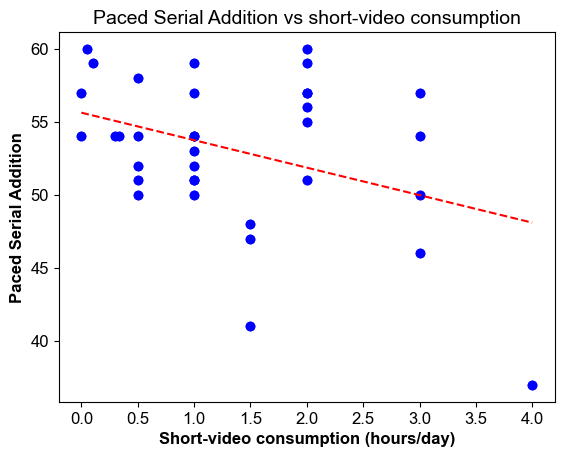

The correlation is statistically significant (r = -0.37, p = 0.028).


(-0.372413476556342, 0.027584568047504476)

In [40]:
#Inspect the data


# Sample data for x and y
x = df2["TMB Paced Serial Addition"]
y = df2["TMB Gradual Onset Continuous Performance Test"]
z = df2[tiktok_var_to_use] 

# Create a plot
# Filter out NaN values from both x and y
mask = ~np.isnan(x) & ~np.isnan(z) 
x_filtered = x[mask]
z_filtered = z[mask]

plt.figure()
#Flip axes
x_ = x_filtered[0:]
x_filtered = z_filtered[0:]
z_filtered = x_[0:]


plt.scatter(x_filtered, z_filtered, color='blue', marker='o')

# Add labels and title
plt.xlabel('Paced Serial Addition')
plt.ylabel(des)

# # Calculate the line of best fit
coefficients = np.polyfit(x_filtered, z_filtered, 1)
# Generate the line of best fit for the entire x-range
slope, intercept = coefficients
x_line = np.linspace(np.nanmin(x_filtered), np.nanmax(x_filtered), 100)  # Use the full x-range, ignoring NaNs
y_line = slope * x_line + intercept
# Plot the original data (filtered)
plt.scatter(x_filtered, z_filtered, color='blue', marker='o', label='Data points')
# Plot the line of best fit over the full x-range
plt.plot(x_line, y_line, color='red', linestyle='--', label='Line of best fit')

# Show the plot
mpl.rcParams['font.family'] = 'Arial'
# Customizing the title, x-axis, and y-axis
plt.title('Paced Serial Addition vs '+ttl)
plt.title('Paced Serial Addition vs '+"short-video consumption", fontsize=14, color='black')  # Custom font size and jet black title
plt.xlabel(des)
plt.xlabel("Short-video consumption (hours/day)", fontsize=12, fontweight='bold',color='black')  # X-axis label custom size and color
plt.ylabel('Paced Serial Addition')
plt.ylabel('Paced Serial Addition', fontsize=12, fontweight='bold', color='black', rotation=90)  # Y-axis label custom size and color and rotate vertically

# Customize the tick labels font size and color
plt.tick_params(axis='x', labelsize=12, labelcolor='black')  # X-axis tick labels size and color
plt.tick_params(axis='y', labelsize=12, labelcolor='black')  # Y-axis tick labels size and color


# Show the plot
plt.show()


# Example: enter your two arrays
x_ = np.array(x_filtered)
z_ = np.array(z_filtered)
# Perform the significance test
correlation_significance_test(x_, z_)

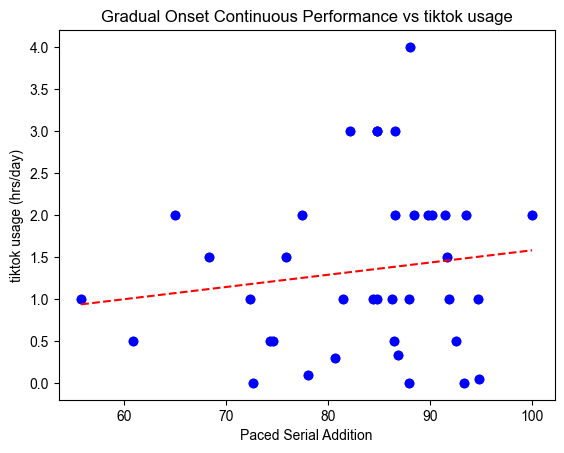

The correlation is not statistically significant (r = 0.14, p = 0.390).


(0.1434086282142562, 0.3903673405501614)

In [41]:
# Create a plot
# Filter out NaN values from both x and y
mask = ~np.isnan(y) & ~np.isnan(z) 
y_filtered = y[mask]
z_filtered = z[mask]

plt.figure()
plt.scatter(y_filtered, z_filtered, color='blue', marker='o')
# Add labels and title
plt.xlabel('Gradual Onset Continuous Performance')
plt.ylabel(des)


# # Calculate the line of best fit
coefficients = np.polyfit(y_filtered, z_filtered, 1)
slope, intercept = coefficients
# Generate the line of best fit for the entire x-range
x_line = np.linspace(np.nanmin(y_filtered), np.nanmax(y_filtered), 100)  # Use the full x-range, ignoring NaNs
y_line = slope * x_line + intercept
# Plot the original data (filtered)
plt.scatter(y_filtered, z_filtered, color='blue', marker='o', label='Data points')
# Plot the line of best fit over the full x-range
plt.plot(x_line, y_line, color='red', linestyle='--', label='Line of best fit')

plt.title('Gradual Onset Continuous Performance vs '+ttl)
plt.xlabel('Paced Serial Addition')
plt.ylabel(des)
# Show the plot
plt.show()


# Example: enter your two arrays
y_ = np.array(y_filtered)
z_ = np.array(z_filtered)
# Perform the significance test
correlation_significance_test(y_, z_)

Variable to compare to chess use is:  TMB Forward Digit Span
Without chess:  7.4 0.41633319989322654
With chess:  8.25 1.1086778913041726
Degrees of Freedom: 3.896074474801619
T-statistic: -0.7177405625652732
P-value: 0.5135954500314064


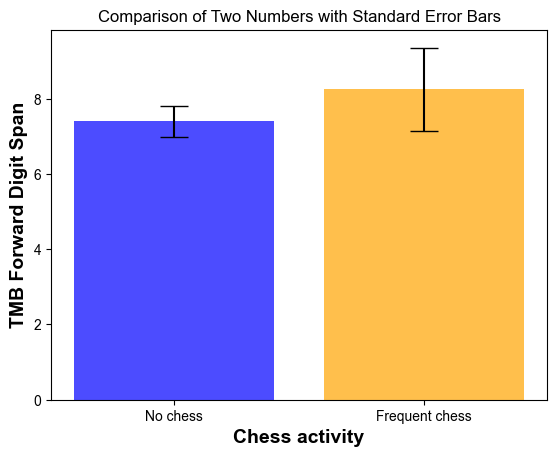



Variable to compare to chess use is:  TMB Backward Digit Span
Without chess:  5.72 0.44914734033870596
With chess:  8.25 0.25
Degrees of Freedom: 23.290443383544005
T-statistic: -4.921831250518916
P-value: 5.47958829526745e-05


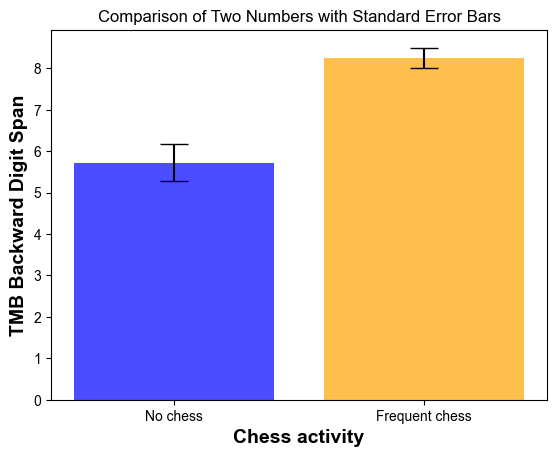



Variable to compare to chess use is:  TMB Matrix Reasoning
Without chess:  32.2 0.7023769168568493
With chess:  34.5 0.6454972243679028
Degrees of Freedom: 12.17595164188858
T-statistic: -2.4110551244604093
P-value: 0.03258113392503032


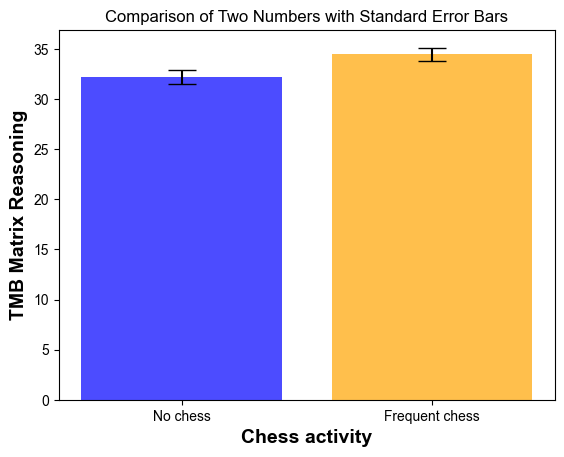



Variable to compare to chess use is:  TMB Paced Serial Addition
Without chess:  52.083333333333336 1.3117593378308667
With chess:  55.5 1.5545631755148024
Degrees of Freedom: 8.247638315327091
T-statistic: -1.679731806520776
P-value: 0.13038674491765484


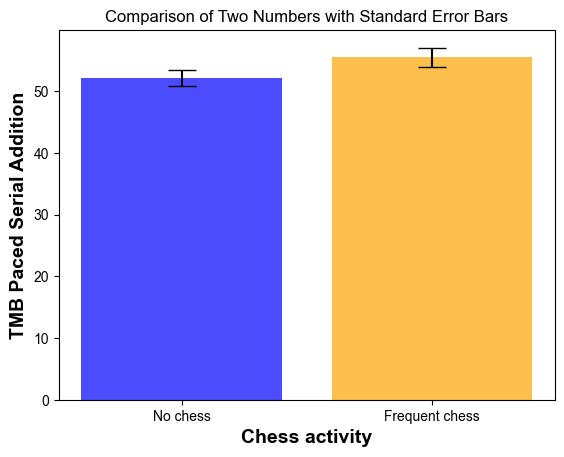



Variable to compare to chess use is:  TMB Digit Symbol Matching
Without chess:  81.16 1.5402164350073229
With chess:  79.5 0.8660254037844386
Degrees of Freedom: 23.101627645643696
T-statistic: 0.9394487475469977
P-value: 0.35722010340993726


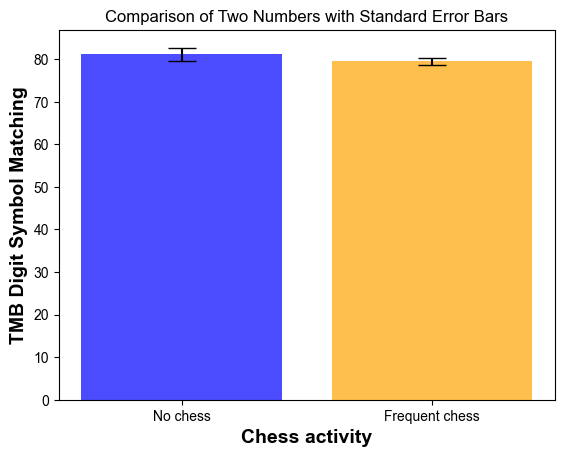



Variable to compare to chess use is:  TMB Verbal Paired Associates Memory - Test
Without chess:  23.166666666666668 0.6303514854183198
With chess:  24.0 0.5773502691896258
Degrees of Freedom: 8.553158956175418
T-statistic: -0.974891390433054
P-value: 0.35637738189433316


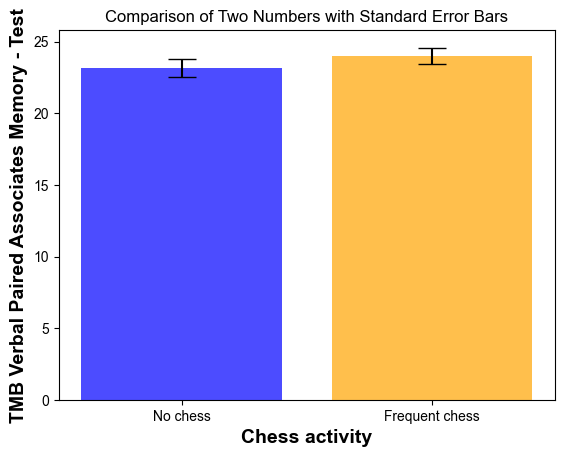



Variable to compare to chess use is:  TMB Visual Paired Associates Memory - Test
Without chess:  20.347826086956523 0.7715512213474507
With chess:  21.75 0.8539125638299665
Degrees of Freedom: 9.073274268777087
T-statistic: -1.2183800946376968
P-value: 0.2538109563535032


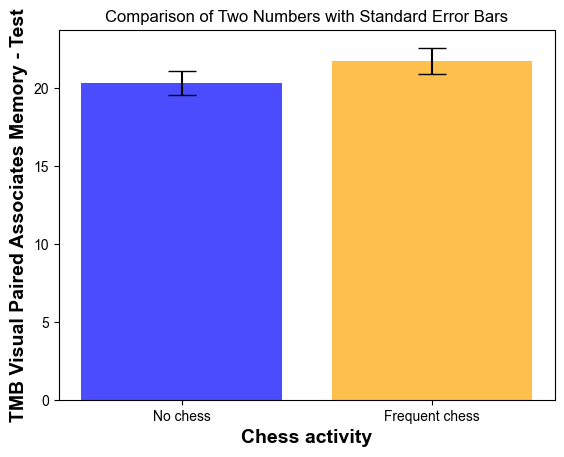

In [42]:
### Hypothesis 3A
# More chess playing should have lead to better Paced Serial Attention 

df3 = df_recoded.copy()

# Binary chess vs non-chess vs chess_graded
for var in ["TMB Forward Digit Span","TMB Backward Digit Span", "TMB Matrix Reasoning", 
            "TMB Paced Serial Addition", "TMB Digit Symbol Matching",
            "TMB Verbal Paired Associates Memory - Test", "TMB Visual Paired Associates Memory - Test"]:
    
    print("Variable to compare to chess use is: ", var)
    
    df3[var+"_nochess"] = (df3[var])*(df3["chess_any"]==0)
    df3[var+"_chess"] = (df3[var])*(df3["chess_any"]==1)
    df3[var+"_chess"] = (df3[var])*(df3["chess_graded"]==2)
    data_nochess = df3[var+"_nochess"].values
    data_chess = df3[var+"_chess"].values
    filtered_data_nochess = data_nochess[(data_nochess != 0) & ~np.isnan(data_nochess)]
    filtered_data_chess = data_chess[(data_chess != 0) & ~np.isnan(data_chess)]


    # Compute the standard deviation (sample)
    std_dev = np.std(filtered_data_nochess, ddof=1)  # ddof=1 for sample standard deviation
    # Compute the sample size
    n1 = len(filtered_data_nochess)
    # Compute the standard error
    standard_error_nochess = std_dev / np.sqrt(n1)
    # Compute the standard deviation (sample)
    std_dev = np.std(filtered_data_chess, ddof=1)  # ddof=1 for sample standard deviation
    # Compute the sample size
    n2 = len(filtered_data_chess)
    # Compute the standard error
    standard_error_chess = std_dev / np.sqrt(n2)

    mean_a = np.mean(filtered_data_nochess)
    se_a = standard_error_nochess
    mean_b = np.mean(filtered_data_chess)
    se_b = standard_error_chess    
    print("Without chess: ", mean_a , se_a )
    print("With chess: ", mean_b , se_b )

    # Calculate sample variances
    s1_squared = np.var(filtered_data_nochess, ddof=1)
    s2_squared = np.var(filtered_data_chess, ddof=1)
    
    # Calculate degrees of freedom for Welch's t-test
    dof = ((s1_squared / n1) + (s2_squared / n2))**2 / \
         (((s1_squared / n1)**2 / (n1 - 1)) + ((s2_squared / n2)**2 / (n2 - 1)))
    
    print(f"Degrees of Freedom: {dof}")

    # Perform independent two-sample t-test
    t_statistic, p_value = stats.ttest_ind(filtered_data_nochess, filtered_data_chess, equal_var=False)  # Set equal_var=False for Welch's t-test
    
    # Output the results
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")


    
    # Data: the two numbers and their respective standard errors
    numbers = [mean_a, mean_b]  # The two numbers to compare
    std_errors = [se_a, se_b]  # Standard errors for each number

    # X-axis labels for the bars
    labels = ['No chess', 'Frequent chess']
    
    # Define the positions for the bars on the x-axis
    x_pos = np.arange(len(numbers))
    
    # Create the bar chart
    fig, ax = plt.subplots()
    mpl.rcParams['font.family'] = 'Arial'
    bars = ax.bar(x_pos, numbers, yerr=std_errors, align='center', alpha=0.7, capsize=10, color=['blue', 'orange'])
    
    # Add labels, title, and customizations
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    #ax.set_ylabel('Value')
    ax.set_title('Comparison of Two Numbers with Standard Error Bars')
    
    plt.xlabel("Chess activity", fontsize=14, color='black', fontweight='bold')  # X-axis label custom size and color
    plt.ylabel(var, fontsize=14, color='black', fontweight='bold', rotation=90)  # Y-axis label custom size and color and rotate vertically
    
    
    # Display the plot
    plt.show()

    print("\n")



In [43]:
# Hypothesis 3
# Students who play chess may also do better than non-chess-players (as per (Aciego et al., 2012)
#...because chess also leads to implicit use of chunking (Thalmann et al., 2019) 
df3_b_corr = df3[["TMB Paced Serial Addition","chess_any","chess_graded"]]

In [44]:
# Hypotheses 4
# We expect positive correlations between time watching videos and the following:
# -	Multiracial Emotion Identification
# -	Multiracial Reading the Mind in the Eye
# -	The Cambridge Face Memory Test
df4 = df_recoded[["TMB Multiracial Emotion Identification","TMB Multiracial Reading the Mind in the Eyes","multiracial","TMB Cambridge Face Memory Test","tiktok","tiktok_time","tiktok_cumulative"]]
df4_corr = df4.corr()
df4_corr.round(2)

,TMB Multiracial Emotion Identification,TMB Multiracial Reading the Mind in the Eyes,multiracial,TMB Cambridge Face Memory Test,tiktok,tiktok_time,tiktok_cumulative
TMB Multiracial Emotion Identification,1.00,0.21,0.70,0.42,0.08,0.09,0.13
TMB Multiracial Reading the Mind in the Eyes,0.21,1.00,0.84,0.21,0.13,-0.15,0.07
multiracial,0.70,0.84,1.00,0.39,0.14,-0.06,0.13
TMB Cambridge Face Memory Test,0.42,0.21,0.39,1.00,-0.00,0.08,-0.02
tiktok,0.08,0.13,0.14,-0.00,1.00,0.55,0.84
tiktok_time,0.09,-0.15,-0.06,0.08,0.55,1.00,0.83
tiktok_cumulative,0.13,0.07,0.13,-0.02,0.84,0.83,1.00


Variable to compare to tiktok use is:  TMB Multiracial Emotion Identification


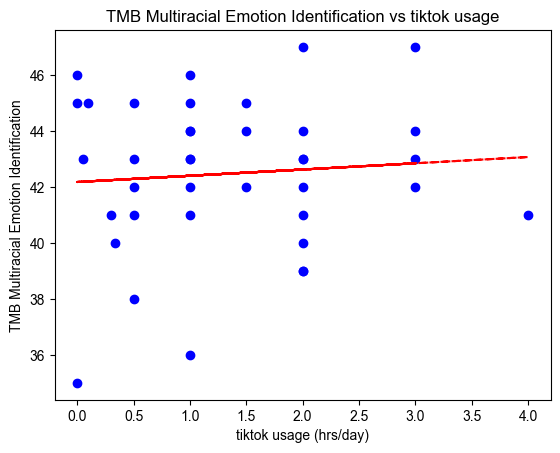

The correlation is not statistically significant (r = 0.08, p = 0.625).
Variable to compare to tiktok use is:  TMB Multiracial Reading the Mind in the Eyes


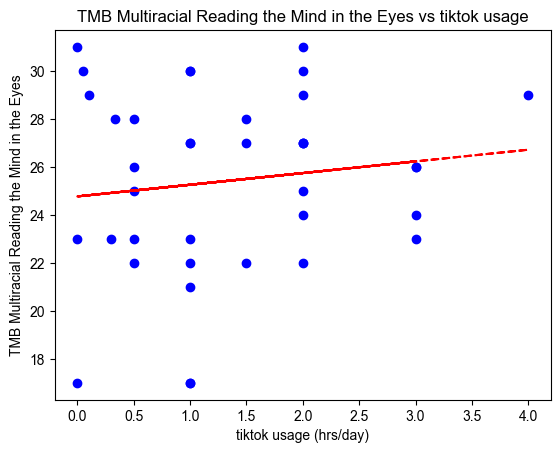

The correlation is not statistically significant (r = 0.13, p = 0.441).
Variable to compare to tiktok use is:  multiracial


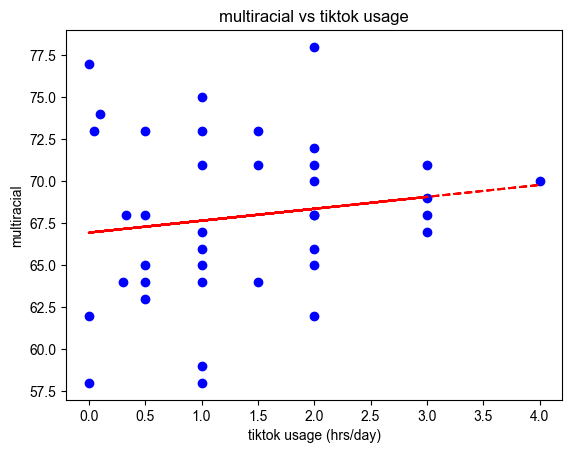

The correlation is not statistically significant (r = 0.14, p = 0.388).
Variable to compare to tiktok use is:  TMB Cambridge Face Memory Test


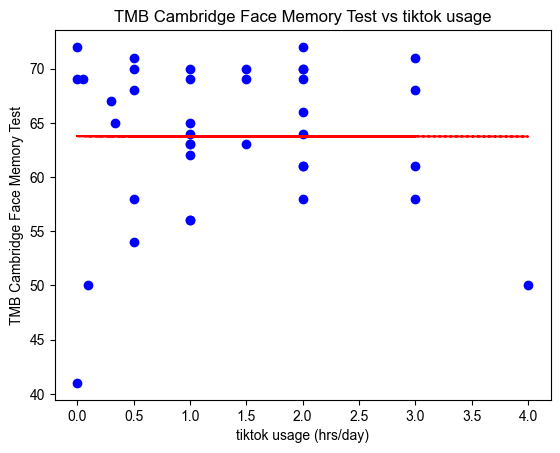

The correlation is not statistically significant (r = -0.00, p = 0.993).


In [45]:
t = df4[tiktok_var_to_use]

for var in ["TMB Multiracial Emotion Identification","TMB Multiracial Reading the Mind in the Eyes","multiracial","TMB Cambridge Face Memory Test"]:
    print("Variable to compare to tiktok use is: ", var)
    
    y = df4[var]
    # Create a plot
    # Filter out NaN values from both x and y
    mask = ~np.isnan(t) & ~np.isnan(y) 
    t_filtered = t[mask]
    y_filtered = y[mask]
    
    plt.figure()
    plt.scatter(t_filtered, y_filtered, color='blue', marker='o')
    # Add labels and title
    plt.xlabel(des)
    plt.ylabel(var)
    # Calculate the line of best fit
    coefficients = np.polyfit(t_filtered, y_filtered, 1)  # 1 indicates a linear fit
    poly = np.poly1d(coefficients)#(x)
    y_fit = poly(t_filtered)
    # Plot the line of best fit
    plt.plot(t_filtered, y_fit, color='red', linestyle='--')
    plt.title(var+" vs "+ttl)
    # Show the plot
    plt.show()
    
    # Example: enter your two arrays
    t_ = np.array(t_filtered)
    y_ = np.array(y_filtered)
    # Perform the significance test
    correlation_significance_test(t_, y_)

In [46]:
# Hypotheses 5
#We also expect a positive correlation between time spent playing video games and performance in the Trail-Making tests (A & B)
#...as these activities both involve visual attention
# (and to Multiple Object Tracking) as video games often require this.
#We expect a larger magnitude of correlation in Trail-Making B than in Trail-Making A
#..as it additionally involves task switching (which many games involve).
#We believe gamers in general are used to “gamifying” tasks/reaching their peak potential and hence may perform better overall
#...and make a specific prediction that it will be correlated with better scores for Digit Symbol Matching.
                                      
df5 = df_recoded[["vgames","TMB Trail-Making (A)","TMB Trail-Making (B)","trail_making_avg",
                "TMB Multiple Object Tracking","TMB Digit Symbol Matching",
                "TMB Forward Digit Span","TMB Backward Digit Span","digit_span",
                  "TMB Paced Serial Addition"]]
df5_corr = df5.corr()
df5_corr.round(2)

,vgames,TMB Trail-Making (A),TMB Trail-Making (B),trail_making_avg,TMB Multiple Object Tracking,TMB Digit Symbol Matching,TMB Forward Digit Span,TMB Backward Digit Span,digit_span,TMB Paced Serial Addition
vgames,1.00,0.34,0.26,0.34,0.12,0.10,0.33,0.35,0.38,0.37
TMB Trail-Making (A),0.34,1.00,0.64,0.93,0.35,0.05,0.05,0.23,0.17,0.23
TMB Trail-Making (B),0.26,0.64,1.00,0.88,0.41,0.21,0.31,0.41,0.41,0.28
trail_making_avg,0.34,0.93,0.88,1.00,0.42,0.13,0.19,0.35,0.31,0.28
TMB Multiple Object Tracking,0.12,0.35,0.41,0.42,1.00,0.47,-0.02,0.12,0.06,0.17
TMB Digit Symbol Matching,0.10,0.05,0.21,0.13,0.47,1.00,0.03,0.02,0.03,0.17
TMB Forward Digit Span,0.33,0.05,0.31,0.19,-0.02,0.03,1.00,0.56,0.87,0.27
TMB Backward Digit Span,0.35,0.23,0.41,0.35,0.12,0.02,0.56,1.00,0.90,0.32
digit_span,0.38,0.17,0.41,0.31,0.06,0.03,0.87,0.90,1.00,0.33
TMB Paced Serial Addition,0.37,0.23,0.28,0.28,0.17,0.17,0.27,0.32,0.33,1.00


Variable to compare to video game use is:  TMB Trail-Making (A)


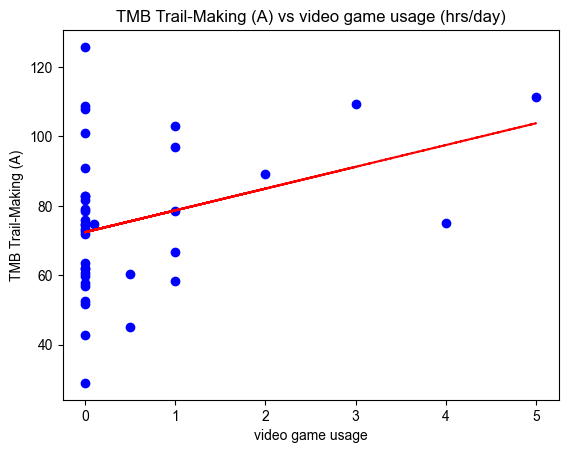

The correlation is statistically significant (r = 0.34, p = 0.036).
Variable to compare to video game use is:  TMB Trail-Making (B)


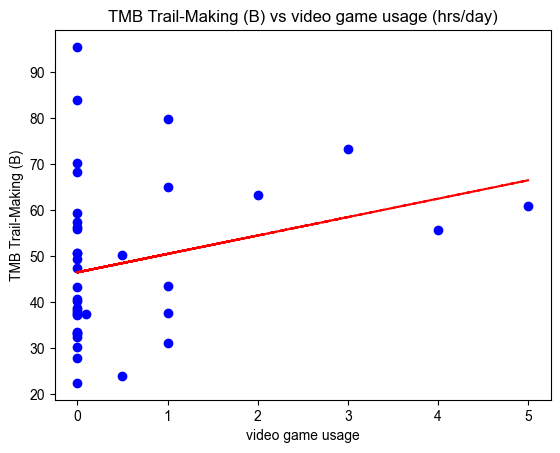

The correlation is not statistically significant (r = 0.26, p = 0.104).
Variable to compare to video game use is:  trail_making_avg


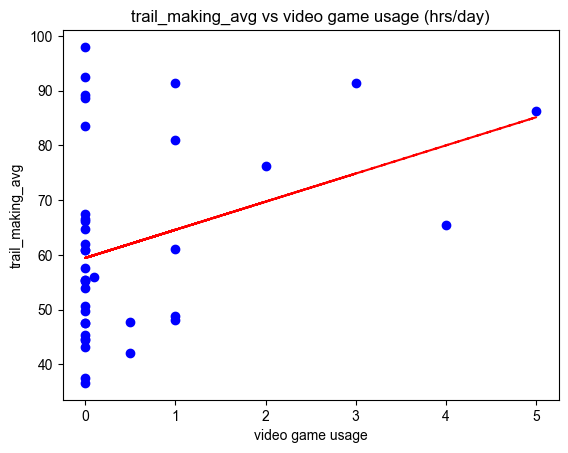

The correlation is statistically significant (r = 0.34, p = 0.037).
Variable to compare to video game use is:  TMB Multiple Object Tracking


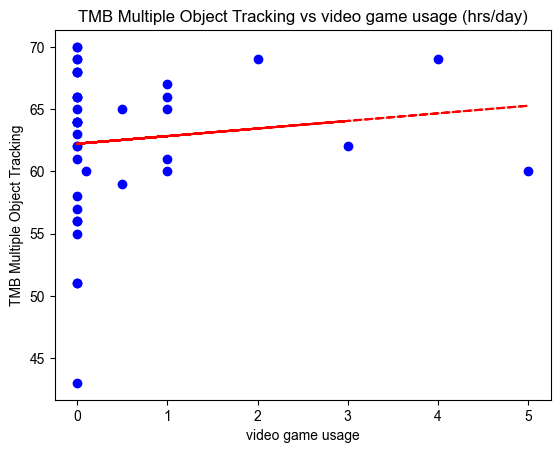

The correlation is not statistically significant (r = 0.12, p = 0.479).
Variable to compare to video game use is:  TMB Digit Symbol Matching


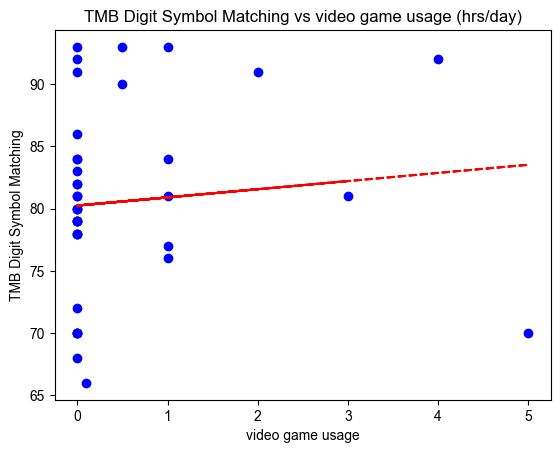

The correlation is not statistically significant (r = 0.10, p = 0.550).
Variable to compare to video game use is:  TMB Forward Digit Span


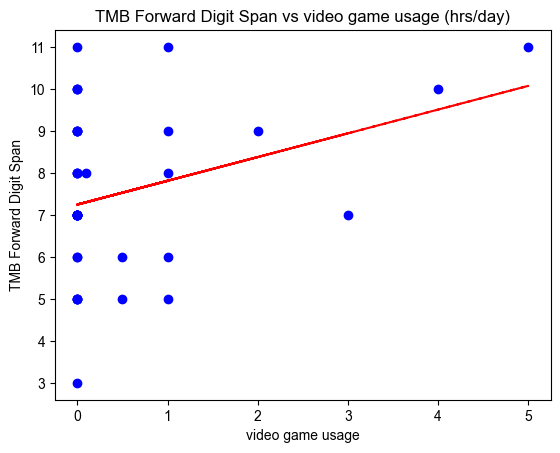

The correlation is statistically significant (r = 0.33, p = 0.041).
Variable to compare to video game use is:  TMB Backward Digit Span


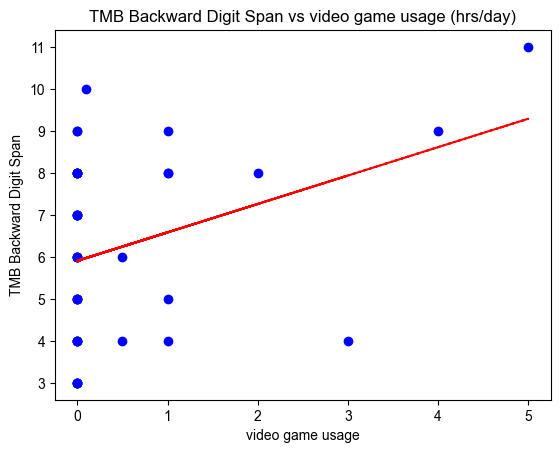

The correlation is statistically significant (r = 0.35, p = 0.027).
Variable to compare to video game use is:  digit_span


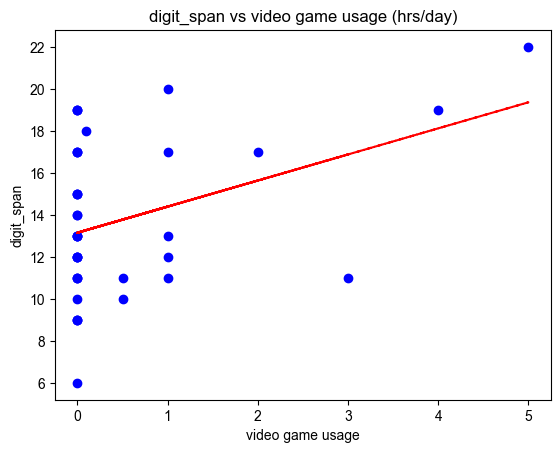

The correlation is statistically significant (r = 0.38, p = 0.016).
Variable to compare to video game use is:  TMB Paced Serial Addition


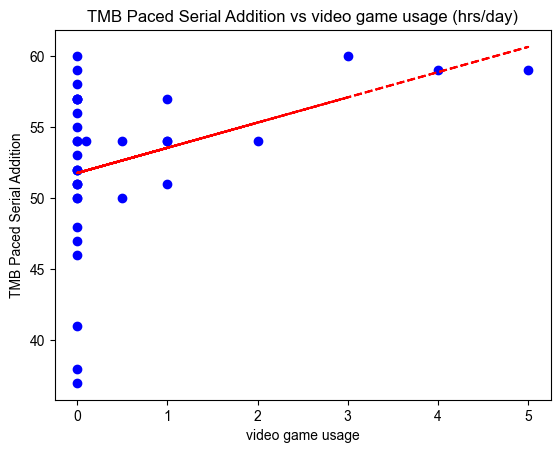

The correlation is statistically significant (r = 0.37, p = 0.024).


In [47]:
t = df5["vgames"]

for var in ["TMB Trail-Making (A)",	"TMB Trail-Making (B)", 'trail_making_avg',
            "TMB Multiple Object Tracking",	"TMB Digit Symbol Matching",
           "TMB Forward Digit Span","TMB Backward Digit Span","digit_span",
            "TMB Paced Serial Addition"]:
    print("Variable to compare to video game use is: ", var)
    
    y = df5[var]
    # Create a plot
    # Filter out NaN values from both x and y
    mask = ~np.isnan(t) & ~np.isnan(y) 
    t_filtered = t[mask]
    y_filtered = y[mask]
    
    plt.figure()
    plt.scatter(t_filtered, y_filtered, color='blue', marker='o')
    # Add labels and title
    plt.xlabel('video game usage')
    plt.ylabel(var)
    # Calculate the line of best fit
    coefficients = np.polyfit(t_filtered, y_filtered, 1)  # 1 indicates a linear fit
    poly = np.poly1d(coefficients)#(x)
    y_fit = poly(t_filtered)
    # Plot the line of best fit
    plt.plot(t_filtered, y_fit, color='red', linestyle='--')
    plt.title(var+" vs video game usage (hrs/day)")
    # Show the plot
    plt.show()
    
    # Example: enter your two arrays
    t_ = np.array(t_filtered)
    y_ = np.array(y_filtered)
    # Perform the significance test
    correlation_significance_test(t_, y_)

In [48]:
# Compare means for binary measure (play video games: yes/no)

df5['vgames_any'] = df5['vgames']
df5['vgames_any'] = (df5['vgames'] > 0) *1.0
df5["vgames_no"]  = df5["vgames_any"]==0
df5["vgames_yes"] = df5["vgames_any"]==1

for var in ["TMB Trail-Making (A)",	"TMB Trail-Making (B)",	'trail_making_avg',
            "TMB Multiple Object Tracking",	"TMB Digit Symbol Matching",
           "TMB Forward Digit Span","TMB Backward Digit Span","digit_span",
            "TMB Paced Serial Addition"]:
    print(var)

    df5[var+"vgames_no"] = (df5[var])*(df5["vgames_no"]==1)
    df5[var+"vgames_yes"] = (df5[var])*(df5["vgames_yes"]==1)
    data_vgames_no = df5[var+"vgames_no"].values
    data_vgames_yes = df5[var+"vgames_yes"].values
    # Filter out 0s and NaNs
    filtered_data_vgames_no = data_vgames_no[(data_vgames_no != 0) & ~np.isnan(data_vgames_no)]
    filtered_data_vgames_yes = data_vgames_yes[(data_vgames_yes != 0) & ~np.isnan(data_vgames_yes)]


    # Compute the standard deviation (sample)
    std_dev = np.std(filtered_data_vgames_no, ddof=1)  # ddof=1 for sample standard deviation
    # Compute the sample size
    n2 = len(filtered_data_vgames_no)
    # Compute the standard error
    standard_error_vgames_no = std_dev / np.sqrt(n2)
    # Compute the standard deviation (sample)
    std_dev = np.std(filtered_data_vgames_yes, ddof=1)  # ddof=1 for sample standard deviation
    # Compute the sample size
    n1 = len(filtered_data_vgames_yes)
    # Compute the standard error
    standard_error_vgames_yes = std_dev / np.sqrt(n1)


    print("Without video games: ", "Mean: ", np.mean(filtered_data_vgames_no), "SE: ", standard_error_vgames_no)
    print("With video games: ", "Mean: ", np.mean(filtered_data_vgames_yes),"SE :", standard_error_vgames_yes)

    # Calculate sample variances
    s1_squared = np.var(filtered_data_vgames_no, ddof=1)
    s2_squared = np.var(filtered_data_vgames_yes, ddof=1)

    # Calculate degrees of freedom for Welch's t-test
    dof = ((s1_squared / n1) + (s2_squared / n2))**2 / \
         (((s1_squared / n1)**2 / (n1 - 1)) + ((s2_squared / n2)**2 / (n2 - 1)))


    # Perform independent two-sample t-test
    t_statistic, p_value = stats.ttest_ind(filtered_data_vgames_yes, filtered_data_vgames_no, equal_var=False)  # Set equal_var=False for Welch's t-test
    
    # Output the results
    print(f"T-statistic: {t_statistic}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p_value}")
    print("\n")

TMB Trail-Making (A)
Without video games:  Mean:  74.04482758620689 SE:  3.8468214638262204
With video games:  Mean:  80.74416666666666 SE : 6.1821753132320145
T-statistic: 0.9200746091769398
Degrees of Freedom: 21.2477574030049
P-value: 0.3685042160972588


TMB Trail-Making (B)
Without video games:  Mean:  47.091724137931024 SE:  3.104189568007959
With video games:  Mean:  51.824999999999996 SE : 5.033981119262458
T-statistic: 0.8003331279414254
Degrees of Freedom: 21.429762191963633
P-value: 0.433002202028282


trail_making_avg
Without video games:  Mean:  60.568275862068965 SE:  3.0864538102647696
With video games:  Mean:  66.28458333333333 SE : 5.275117313729726
T-statistic: 0.9353033486170105
Degrees of Freedom: 22.54015934784211
P-value: 0.3613998856836975


TMB Multiple Object Tracking
Without video games:  Mean:  62.6551724137931 SE:  1.2684848629213146
With video games:  Mean:  63.583333333333336 SE : 1.062147148777685
T-statistic: 0.561008170864896
Degrees of Freedom: 13.7219

In [49]:
# Hypotheses 6
# We expect that on the basis of research by (Mo et al., 2022) that individuals that
#...increase the speed when listening to lectures are better at self-regulated learning (Zhao et al., 2014) than those who do not.
# Consequently, we expect that students who report increasing the speed of lectures will have better results
# (than those who do not increase the speed) in the following tests
# as these tests involve elements amenable to improvement by self-regulated learning:
#1. Matrix Reasoning: The test was not time limited, allowing test-takers time to learn regularities in the rules
#...needed to solve the puzzle and note these (if needed).
#2. Digit Symbol Matching: Students may devise several on-line strategies to improve speed at this task
#...e.g., skipping the step of needing to match the symbol to the column (by merely memorising which symbol was associated with each digit)
#3. Visual Paired Associates Memory and
#4. Verbal Paired Associates Memory: Students could devise several strategies online to improve performance
#...such as imagining the pairs in similar locations in a room, having avatars speak the verbal paired associates and so on
#Digit Span (both 5. Forward Digit Span, and 6. Backward Digit Span)
# Students may also strategically employ ‘chunking’ to remember longer spans.


df6 = df_recoded[["TMB Matrix Reasoning", "TMB Digit Symbol Matching",
            "TMB Verbal Paired Associates Memory - Test","TMB Visual Paired Associates Memory - Test",
            "TMB Trail-Making (A)",	"TMB Trail-Making (B)",	"trail_making_avg",
            "TMB Multiple Object Tracking",	
             "TMB Forward Digit Span","TMB Backward Digit Span","digit_span",
                 "speed"]]

df6['speed'][(df_recoded['speed'] == "No")] = 0
df6['speed'][(df_recoded['speed'] == "Yes")] = 1
df6_corr = df6.corr()
df6_corr.round(2)

,TMB Matrix Reasoning,TMB Digit Symbol Matching,TMB Verbal Paired Associates Memory - Test,TMB Visual Paired Associates Memory - Test,TMB Trail-Making (A),TMB Trail-Making (B),trail_making_avg,TMB Multiple Object Tracking,TMB Forward Digit Span,TMB Backward Digit Span,digit_span,speed
TMB Matrix Reasoning,1.00,0.11,0.44,0.07,0.58,0.37,0.53,0.20,0.32,0.35,0.38,-0.18
TMB Digit Symbol Matching,0.11,1.00,-0.19,0.32,0.05,0.21,0.13,0.47,0.03,0.02,0.03,-0.03
TMB Verbal Paired Associates Memory - Test,0.44,-0.19,1.00,-0.02,0.25,0.22,0.26,-0.28,0.19,0.25,0.25,-0.05
TMB Visual Paired Associates Memory - Test,0.07,0.32,-0.02,1.00,0.07,0.28,0.18,0.27,0.14,0.29,0.25,0.16
TMB Trail-Making (A),0.58,0.05,0.25,0.07,1.00,0.64,0.93,0.35,0.05,0.23,0.17,-0.25
TMB Trail-Making (B),0.37,0.21,0.22,0.28,0.64,1.00,0.88,0.41,0.31,0.41,0.41,-0.28
trail_making_avg,0.53,0.13,0.26,0.18,0.93,0.88,1.00,0.42,0.19,0.35,0.31,-0.29
TMB Multiple Object Tracking,0.20,0.47,-0.28,0.27,0.35,0.41,0.42,1.00,-0.02,0.12,0.06,-0.32
TMB Forward Digit Span,0.32,0.03,0.19,0.14,0.05,0.31,0.19,-0.02,1.00,0.56,0.87,0.06
TMB Backward Digit Span,0.35,0.02,0.25,0.29,0.23,0.41,0.35,0.12,0.56,1.00,0.90,-0.05


In [50]:
for var in ["TMB Matrix Reasoning", "TMB Digit Symbol Matching",
            "TMB Verbal Paired Associates Memory - Test","TMB Visual Paired Associates Memory - Test",
            "TMB Trail-Making (A)",	"TMB Trail-Making (B)","trail_making_avg",
            "TMB Multiple Object Tracking",	
             "TMB Forward Digit Span","TMB Backward Digit Span","digit_span"]:


    df6[var+"speed_no"] = (df6[var])*(df6["speed"]==0)
    df6[var+"speed_yes"] = (df6[var])*(df6["speed"]==1)
    data_speed_no = df6[var+"speed_no"].values
    data_speed_yes = df6[var+"speed_yes"].values
    # Filter out 0s and NaNs
    filtered_data_speed_no = data_speed_no[(data_speed_no != 0) & ~np.isnan(data_speed_no)]
    filtered_data_speed_yes = data_speed_yes[(data_speed_yes != 0) & ~np.isnan(data_speed_yes)]

    # Compute the standard deviation (sample)
    std_dev = np.std(filtered_data_speed_no, ddof=1)  # ddof=1 for sample standard deviation
    # Compute the sample size
    n2 = len(filtered_data_speed_no)
    # Compute the standard error
    standard_error_speed_no = std_dev / np.sqrt(n2)
    # Compute the standard deviation (sample)
    std_dev = np.std(filtered_data_speed_yes, ddof=1)  # ddof=1 for sample standard deviation
    # Compute the sample size
    n1 = len(filtered_data_speed_yes)
    # Compute the standard error
    standard_error_speed_yes = std_dev / np.sqrt(n1)


    print("Normal speed ", "mean: ", np.mean(filtered_data_speed_no),"SE: ", standard_error_speed_no)
    print("Faster speed ", "mean: ", np.mean(filtered_data_speed_yes),"SE: ", standard_error_speed_yes)

    
    # Calculate sample variances
    s1_squared = np.var(filtered_data_speed_no, ddof=1)
    s2_squared = np.var(filtered_data_speed_yes, ddof=1)

    # Calculate degrees of freedom for Welch's t-test
    dof = ((s1_squared / n1) + (s2_squared / n2))**2 / \
         (((s1_squared / n1)**2 / (n1 - 1)) + ((s2_squared / n2)**2 / (n2 - 1)))


    # Perform independent two-sample t-test
    t_statistic, p_value = stats.ttest_ind(filtered_data_speed_no, filtered_data_speed_yes, equal_var=False)  # Set equal_var=False for Welch's t-test
    
    # Output the results
    print(f"T-statistic: {t_statistic}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p_value}")
    print("\n")

Normal speed  mean:  33.333333333333336 SE:  0.8164965809277259
Faster speed  mean:  32.03333333333333 SE:  0.6035971354435912
T-statistic: 1.2803090832371031
Degrees of Freedom: 10.77136033660077
P-value: 0.21698281752723275


Normal speed  mean:  81.0 SE:  2.6822461565718467
Faster speed  mean:  80.46666666666667 SE:  1.3785994336526592
T-statistic: 0.17684705566482223
Degrees of Freedom: 13.933518959608728
P-value: 0.8624519938018838


Normal speed  mean:  23.444444444444443 SE:  0.5030769521187454
Faster speed  mean:  23.071428571428573 SE:  0.6297907845870071
T-statistic: 0.46276791640068005
Degrees of Freedom: 9.077866427593154
P-value: 0.6468138487195176


Normal speed  mean:  19.666666666666668 SE:  1.414213562373095
Faster speed  mean:  20.857142857142858 SE:  0.5556689226734697
T-statistic: -0.7834847926816433
Degrees of Freedom: 19.67894519302306
P-value: 0.4505160615011147


Normal speed  mean:  85.14666666666668 SE:  4.836965589200642
Faster speed  mean:  72.78966666666665

In [51]:
#Hypotheses 7
#We believe that students who reported preparation before engaging in the tasks
#...(specifically, those who reported taking 10 seconds to steady their thoughts before beginning each test)
#...are more motivated to perform well in the tests and may be preparing their responses.
#We predict that this motivation and the possible engagement of strategic thinking will result in
#...those answering affirmatively to perform better in the following tests amenable to these qualities
#Visual Paired Associates Memory, Verbal Paired Associates Memory, Digit Span (both Forward Digit Span, and Backward Digit Span)
df7 = df_recoded[["preparation","TMB Verbal Paired Associates Memory - Test","TMB Visual Paired Associates Memory - Test",
         "TMB Forward Digit Span","TMB Backward Digit Span","digit_span"]]
df7['preparation'][(df_recoded['preparation'] == "No")] = 0
df7['preparation'][(df_recoded['preparation'] == "Yes")] = 1
df7_corr = df7.corr()
df7_corr.round(2)

,preparation,TMB Verbal Paired Associates Memory - Test,TMB Visual Paired Associates Memory - Test,TMB Forward Digit Span,TMB Backward Digit Span,digit_span
preparation,1.00,-0.04,-0.28,0.04,0.15,0.11
TMB Verbal Paired Associates Memory - Test,-0.04,1.00,-0.02,0.19,0.25,0.25
TMB Visual Paired Associates Memory - Test,-0.28,-0.02,1.00,0.14,0.29,0.25
TMB Forward Digit Span,0.04,0.19,0.14,1.00,0.56,0.87
TMB Backward Digit Span,0.15,0.25,0.29,0.56,1.00,0.90
digit_span,0.11,0.25,0.25,0.87,0.90,1.00


In [52]:
for var in ["TMB Verbal Paired Associates Memory - Test","TMB Visual Paired Associates Memory - Test",
         "TMB Forward Digit Span","TMB Backward Digit Span","digit_span"]:
    print(var)

    df7[var+"preparation_no"] = (df7[var])*(df7["preparation"]==0)
    df7[var+"preparation_yes"] = (df7[var])*(df7["preparation"]==1)
    data_preparation_no = df7[var+"preparation_no"].values
    data_preparation_yes = df7[var+"preparation_yes"].values
    # Filter out 0s and NaNs
    filtered_data_preparation_no = data_preparation_no[(data_preparation_no != 0) & ~np.isnan(data_preparation_no)]
    filtered_data_preparation_yes = data_preparation_yes[(data_preparation_yes != 0) & ~np.isnan(data_preparation_yes)]

    # Compute the standard deviation (sample)
    std_dev = np.std(filtered_data_preparation_no, ddof=1)  # ddof=1 for sample standard deviation
    # Compute the sample size
    n2 = len(filtered_data_preparation_no)
    # Compute the standard error
    standard_error_preparation_no = std_dev / np.sqrt(n2)
    # Compute the standard deviation (sample)
    std_dev = np.std(filtered_data_preparation_yes, ddof=1)  # ddof=1 for sample standard deviation
    # Compute the sample size
    n1 = len(filtered_data_preparation_yes)
    # Compute the standard error
    standard_error_preparation_yes = std_dev / np.sqrt(n1)


    print("No preparation ", "mean: ", np.mean(filtered_data_preparation_no),"SE: ", standard_error_preparation_no)
    print("With preparation ", "mean: ", np.mean(filtered_data_preparation_yes),"SE: ", standard_error_preparation_yes)

    
    # Calculate sample variances
    s1_squared = np.var(filtered_data_preparation_no, ddof=1)
    s2_squared = np.var(filtered_data_preparation_yes, ddof=1)

    # Calculate degrees of freedom for Welch's t-test
    dof = ((s1_squared / n1) + (s2_squared / n2))**2 / \
         (((s1_squared / n1)**2 / (n1 - 1)) + ((s2_squared / n2)**2 / (n2 - 1)))


    # Perform independent two-sample t-test
    t_statistic, p_value = stats.ttest_ind(filtered_data_preparation_no, filtered_data_preparation_yes, equal_var=False)  # Set equal_var=False for Welch's t-test
    
    # Output the results
    print(f"T-statistic: {t_statistic}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p_value}")
    print("\n")

TMB Verbal Paired Associates Memory - Test
No preparation  mean:  23.24 SE:  0.51406873729752
With preparation  mean:  23.0 SE:  1.1009637651263606
T-statistic: 0.19751996784853892
Degrees of Freedom: 30.779214328053204
P-value: 0.8459125824285346


TMB Visual Paired Associates Memory - Test
No preparation  mean:  21.153846153846153 SE:  0.5253344947373499
With preparation  mean:  19.181818181818183 SE:  1.2707777276368402
T-statistic: 1.4341159314893714
Degrees of Freedom: 29.133765452093613
P-value: 0.17421003394485232


TMB Forward Digit Span
No preparation  mean:  7.481481481481482 SE:  0.35151430802670597
With preparation  mean:  7.666666666666667 SE:  0.6666666666666666
T-statistic: -0.2457137672857851
Degrees of Freedom: 26.520020671772514
P-value: 0.808779106564922


TMB Backward Digit Span
No preparation  mean:  6.037037037037037 SE:  0.37923855890801145
With preparation  mean:  6.75 SE:  0.7500000000000001
T-statistic: -0.8483315879061524
Degrees of Freedom: 27.59386053559691

In [53]:
##### Hypotheses 8
# We predict that those that there will be positive correlations between self-reported use of two different emotion regulation techniques
# (1: use of journalling/deep breathing/conversation and 2: time spent listening to music) and the results in
# Multiracial Emotion Identification
# Multiracial Reading the Mind in the Eyes  
# This hypothesis is based on the simple assumption that those who are more in touch with their own emotions
#... and seek to regulate or express them more often will be able to better identify emotions in others.
# There is likely a negative correlation with age too (Gonçalves et al., 2018) and (Cortes et al., 2021)
df8 = copy.deepcopy(df_recoded)

# # Remove outliers
# df8.loc[1, "TMB Multiracial Reading the Mind in the Eyes"] = np.nan # 17, biggest outlier
# df8.loc[18, "TMB Multiracial Reading the Mind in the Eyes"] = np.nan # 17, biggest outlier
# df8.loc[25, "TMB Multiracial Reading the Mind in the Eyes"] = np.nan # 17, biggest outlier

IV:  emotion_reg
DV:  TMB Multiracial Emotion Identification


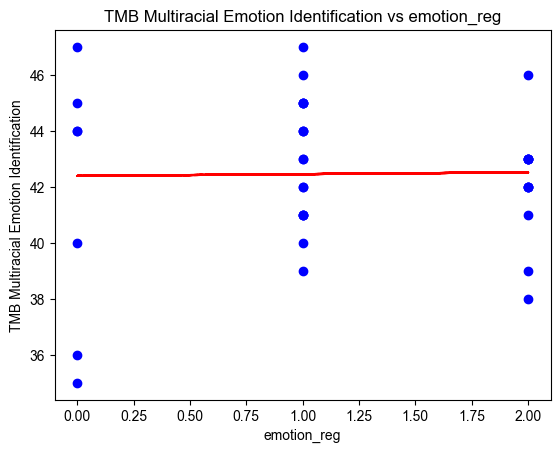

The correlation is not statistically significant (r = 0.02, p = 0.919).
IV:  emotion_reg
DV:  TMB Multiracial Reading the Mind in the Eyes


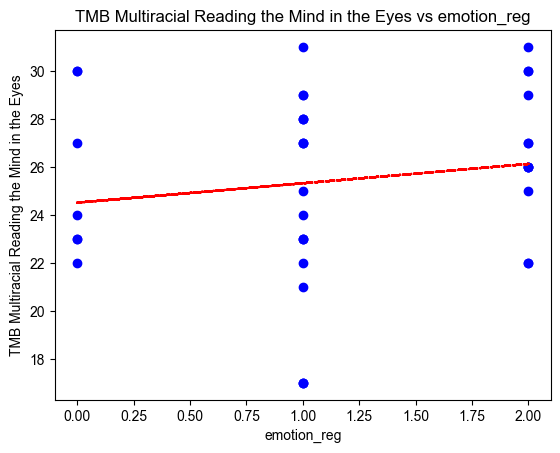

The correlation is not statistically significant (r = 0.15, p = 0.354).
IV:  emotion_reg
DV:  multiracial


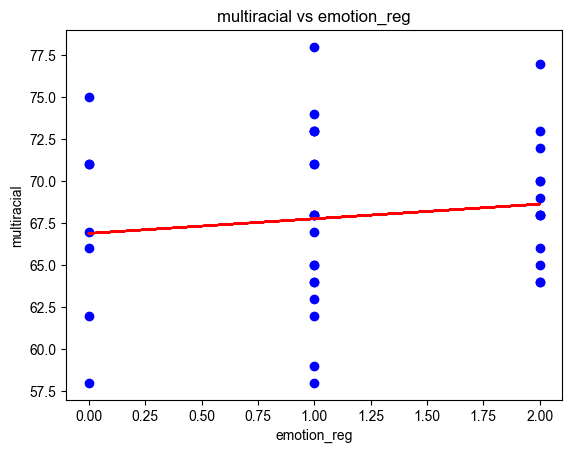

The correlation is not statistically significant (r = 0.13, p = 0.443).
IV:  music
DV:  TMB Multiracial Emotion Identification


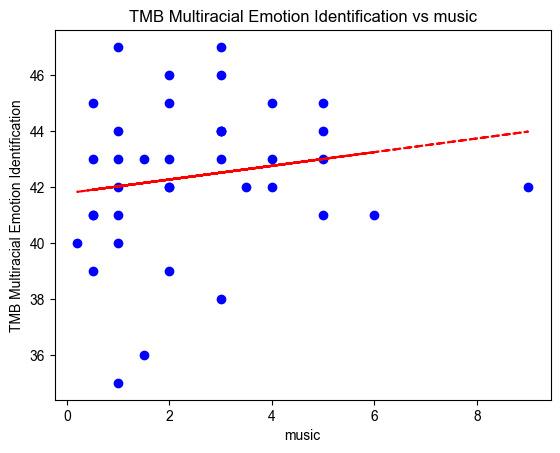

The correlation is not statistically significant (r = 0.17, p = 0.303).
IV:  music
DV:  TMB Multiracial Reading the Mind in the Eyes


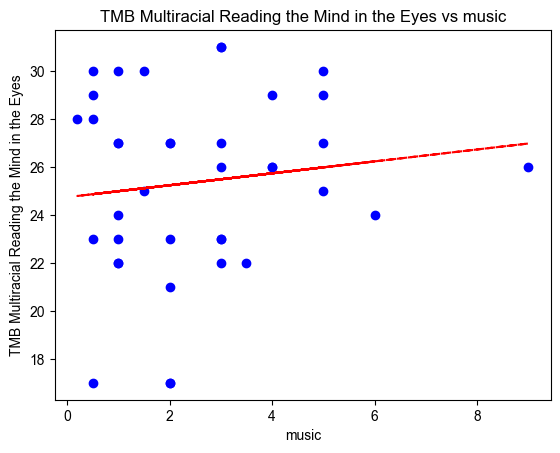

The correlation is not statistically significant (r = 0.13, p = 0.455).
IV:  music
DV:  multiracial


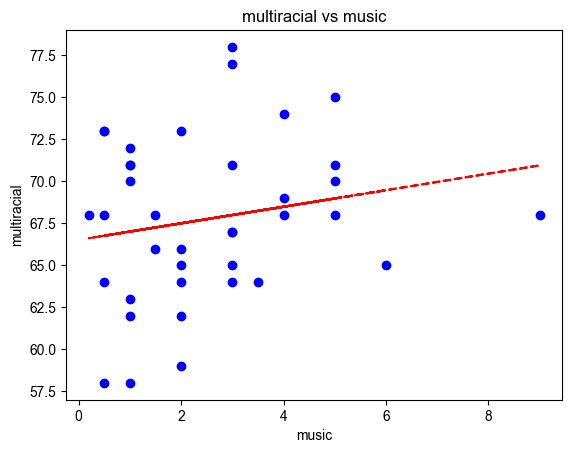

The correlation is not statistically significant (r = 0.19, p = 0.248).


In [54]:
for IV in ["emotion_reg","music"]:
    
    for DV in ["TMB Multiracial Emotion Identification","TMB Multiracial Reading the Mind in the Eyes","multiracial"]:
    
        print("IV: ", IV)
        print("DV: ", DV)

        t = df8[IV].values
        y = df8[DV].values
        #t = [float(x) for x in t]
        #y = [float(x) for x in y]
        t_numeric = pd.to_numeric(t, errors='coerce')
        y_numeric = pd.to_numeric(y, errors='coerce')       
        # Create a plot
        # Filter out NaN values from both x and y
        mask = ~np.isnan(t_numeric) & ~np.isnan(y_numeric)
        t_filtered = t_numeric[mask]
        y_filtered = y_numeric[mask]
        
        plt.figure()
        plt.scatter(t_filtered, y_filtered, color='blue', marker='o')
        # Add labels and title
        plt.xlabel(IV)
        plt.ylabel(DV)
        # Calculate the line of best fit
        coefficients = np.polyfit(t_filtered, y_filtered, 1)  # 1 indicates a linear fit
        poly = np.poly1d(coefficients)
        y_fit = poly(t_filtered)
        # Plot the line of best fit
        plt.plot(t_filtered, y_fit, color='red', linestyle='--')
        plt.title(DV+" vs "+str(IV))
        # Show the plot
        plt.show()
        
        # Example: enter your two arrays
        t_ = np.array(t_filtered)
        y_ = np.array(y_filtered)
        # Perform the significance test
        correlation_significance_test(t_, y_)

In [55]:
for var in ["TMB Matrix Reasoning", "TMB Digit Symbol Matching",
            "TMB Verbal Paired Associates Memory - Test","TMB Visual Paired Associates Memory - Test",
            "TMB Trail-Making (A)",	"TMB Trail-Making (B)","trail_making_avg",
            "TMB Multiple Object Tracking",	
             "TMB Forward Digit Span","TMB Backward Digit Span","digit_span"]:
    print(var)

    df8[var+"music_aesthetic"] = (df8[var])*(df8["music_type"]==0)
    df8[var+"music_thematic"] = (df8[var])*(df8["music_type"]==1)
    data_aesthetic = df8[var+"music_aesthetic"].values
    data_thematic = df8[var+"music_thematic"].values
    # Filter out 0s and NaNs
    filtered_data_aesthetic = data_aesthetic[(data_aesthetic != 0) & ~np.isnan(data_aesthetic)]
    filtered_data_thematic = data_thematic[(data_thematic != 0) & ~np.isnan(data_thematic)]

    # Compute the standard deviation (sample)
    std_dev = np.std(filtered_data_aesthetic, ddof=1)  # ddof=1 for sample standard deviation
    # Compute the sample size
    n1 = len(filtered_data_aesthetic)
    # Compute the standard error
    standard_error_aesthetic = std_dev / np.sqrt(n1)
    # Compute the standard deviation (sample)
    std_dev = np.std(filtered_data_thematic, ddof=1)  # ddof=1 for sample standard deviation
    # Compute the sample size
    n2 = len(filtered_data_thematic)
    # Compute the standard error
    standard_error_thematic = std_dev / np.sqrt(n2)


    print("Aesthetic music taste ", "mean: ", np.mean(filtered_data_aesthetic),"SE: ", standard_error_aesthetic)
    print("Thematic music taste ", "mean: ", np.mean(filtered_data_thematic),"SE: ", standard_error_thematic)

    
    # Calculate sample variances
    s1_squared = np.var(filtered_data_aesthetic, ddof=1)
    s2_squared = np.var(filtered_data_thematic, ddof=1)

    # Calculate degrees of freedom for Welch's t-test
    dof = ((s1_squared / n1) + (s2_squared / n2))**2 / \
         (((s1_squared / n1)**2 / (n1 - 1)) + ((s2_squared / n2)**2 / (n2 - 1)))


    # Perform independent two-sample t-test
    t_statistic, p_value = stats.ttest_ind(filtered_data_aesthetic, filtered_data_thematic, equal_var=False)  # Set equal_var=False for Welch's t-test
    
    # Output the results
    print(f"T-statistic: {t_statistic}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p_value}")
    print("\n")

TMB Matrix Reasoning
Aesthetic music taste  mean:  33.77272727272727 SE:  0.3717969595653924
Thematic music taste  mean:  30.470588235294116 SE:  0.8749691047437363
T-statistic: 3.4734275662439633
Degrees of Freedom: 21.759125585452352
P-value: 0.0021832067464177497


TMB Digit Symbol Matching
Aesthetic music taste  mean:  82.54545454545455 SE:  1.5014095436845276
Thematic music taste  mean:  78.05882352941177 SE:  1.8579530724367508
T-statistic: 1.8782183941647315
Degrees of Freedom: 32.99839718206965
P-value: 0.069211540279456


TMB Verbal Paired Associates Memory - Test
Aesthetic music taste  mean:  24.0 SE:  0.3086066999241839
Thematic music taste  mean:  22.0625 SE:  1.0102340900339222
T-statistic: 1.8341987350975069
Degrees of Freedom: 17.813826379532276
P-value: 0.08338457318096083


TMB Visual Paired Associates Memory - Test
Aesthetic music taste  mean:  21.227272727272727 SE:  0.7205451825489162
Thematic music taste  mean:  19.6 SE:  0.7671840904055743
T-statistic: 1.546101977

In [56]:
#### Find any pair with statistically significant relationship
max_p = 0.05

correlation_matrix = df_recoded.corr()

# Create an empty list to store pairs of columns with correlation > x
significant_pairs = {}
pairs_tried = []
errors = []

# Iterate through the correlation matrix to find pairs with correlation > x
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1!=col2 and (col1, col2) not in pairs_tried and (col2, col1) not in pairs_tried:
            try:
                r, p = correlation_significance_test(df_recoded[col1].values,df_recoded[col2].values)
                if p <= max_p:
                    significant_pairs[(col1, col2)] = (round(r,3), round(p,3))
                pairs_tried.append((col1,col2))
            except:
                errors.append((col1,col2))
                print("Error", col1, " : ", col2)

from IPython.display import clear_output
# Clear the output
clear_output(wait=False)

In [57]:
# Display all the pairs with significant relationships
for key in significant_pairs.keys():
    print(key,significant_pairs[key])

('TMB Simple Reaction Time', 'TMB Choice Reaction Time') (0.363, 0.021)
('TMB Simple Reaction Time', 'TMB Digit Symbol Matching') (0.35, 0.027)
('TMB Simple Reaction Time', 'TMB Backward Digit Span') (0.324, 0.041)
('TMB Choice Reaction Time', 'TMB Digit Symbol Matching') (0.477, 0.002)
('TMB Choice Reaction Time', 'TMB Visual Paired Associates Memory - Test') (0.322, 0.046)
('TMB Choice Reaction Time', 'TMB Gradual Onset Continuous Performance Test') (0.33, 0.035)
('TMB Choice Reaction Time', 'TMB Forward Digit Span') (0.383, 0.013)
('TMB Choice Reaction Time', 'TMB Backward Digit Span') (0.427, 0.005)
('TMB Choice Reaction Time', 'TMB Trail-Making (A)') (0.336, 0.032)
('TMB Choice Reaction Time', 'TMB Trail-Making (B)') (0.402, 0.009)
('TMB Choice Reaction Time', 'TMB Paced Serial Addition') (0.407, 0.01)
('TMB Choice Reaction Time', 'languages_eng_1st') (-0.343, 0.028)
('TMB Choice Reaction Time', 'mood') (0.39, 0.015)
('TMB Choice Reaction Time', 'music_type') (-0.453, 0.004)
('TMB

In [58]:
# Count the variables which have most relationships to others
elems_a = [elem[0] for elem in significant_pairs]
elems_b = [elem[1] for elem in significant_pairs]

num_correlated_to_a = Counter(elems_a)
num_correlated_to_b = Counter(elems_b)
num_correlated_to = num_correlated_to_a + num_correlated_to_b
print(num_correlated_to)

Counter({'TMB Choice Reaction Time': 16, 'iq_normalised': 16, 'TMB Matrix Reasoning': 13, 'TMB Backward Digit Span': 13, 'music_type': 13, 'trail_making_avg': 11, 'TMB Trail-Making (A)': 10, 'TMB Forward Digit Span': 9, 'TMB Trail-Making (B)': 9, 'digit_span': 9, 'TMB Digit Symbol Matching': 7, 'TMB Vocabulary': 7, 'TMB Multiple Object Tracking': 7, 'vgames': 7, 'reading': 7, 'enjoy_matrix': 7, 'TMB Paced Serial Addition': 6, 'exercise_hours': 6, 'exercise_rating': 6, 'music_num_genres': 6, 'tiktok_time': 6, 'tiktok_cumulative': 6, 'TMB Verbal Paired Associates Memory - Test': 5, 'languages_eng_1st': 5, 'sleep_hours': 5, 'tiktok': 5, 'tiktok_addict': 5, 'TMB Cambridge Face Memory Test': 4, 'TMB Gradual Onset Continuous Performance Test': 4, 'music': 4, 'multiracial': 4, 'TMB Simple Reaction Time': 3, 'TMB Multiracial Emotion Identification': 3, 'sleep_quality': 3, 'mood': 3, 'stress': 3, 'music_play_instr': 3, 'phone_time': 3, 'chess_any': 3, 'chess_graded': 3, 'sleep_overall': 3, 'TMB

In [59]:
# Find all significantly correlated with x
find_var = "sleep"
plot_all(find_var)

In [60]:
# Find all significantly correlated with x
find_var = "vgames"
plot_all(find_var)

TMB Forward Digit Span (0.328, 0.041)
TMB Backward Digit Span (0.354, 0.027)
TMB Trail-Making (A) (0.336, 0.036)
TMB Paced Serial Addition (0.372, 0.024)
digit_span (0.385, 0.016)
trail_making_avg (0.336, 0.037)
iq_normalised (0.387, 0.018)


In [61]:
#### Find any pair with correlation > x or < - x
x = 0.4
correlation_matrix = df_recoded.corr()
pairs = []

# Create an empty list to store pairs of columns with correlation > x
high_correlation_pairs = []

# Iterate through the correlation matrix to find pairs with correlation > x
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        corr = correlation_matrix.loc[col1, col2]
        if col1 != col2 and abs(corr) > x:
            pair = [col1, col2, corr]
            pair_rev = [col2, col1, corr]

            #print(pair,
            # Check if the pair (or its reverse) already exists
            if pair not in high_correlation_pairs and pair_rev not in high_correlation_pairs:
                high_correlation_pairs.append(pair)

In [62]:
# Display high correlations between TMB variables
ranked_pairs = sorted(high_correlation_pairs, key=lambda x: abs(x[2]), reverse=True)
for pair in ranked_pairs:
    if "TMB" in pair[0] and "TMB" in pair[1] and pair[0] not in pair[1] and pair[1] not in pair[0]:
        print(f"Correlation: {pair[2]:.2f} {pair[0]} and {pair[1]}")

Correlation: 0.64 TMB Trail-Making (A) and TMB Trail-Making (B)
Correlation: 0.58 TMB Matrix Reasoning and TMB Trail-Making (A)
Correlation: 0.56 TMB Forward Digit Span and TMB Backward Digit Span
Correlation: 0.48 TMB Matrix Reasoning and TMB Paced Serial Addition
Correlation: 0.48 TMB Choice Reaction Time and TMB Digit Symbol Matching
Correlation: 0.47 TMB Digit Symbol Matching and TMB Multiple Object Tracking
Correlation: 0.47 TMB Multiracial Reading the Mind in the Eyes and TMB Verbal Paired Associates Memory - Test
Correlation: 0.44 TMB Matrix Reasoning and TMB Verbal Paired Associates Memory - Test
Correlation: 0.43 TMB Choice Reaction Time and TMB Backward Digit Span
Correlation: 0.42 TMB Cambridge Face Memory Test and TMB Multiracial Emotion Identification
Correlation: 0.41 TMB Backward Digit Span and TMB Trail-Making (B)
Correlation: 0.41 TMB Choice Reaction Time and TMB Paced Serial Addition
Correlation: 0.41 TMB Trail-Making (B) and TMB Multiple Object Tracking
Correlation: 

In [63]:
# Display high correlations between TMB and non-TMB
ranked_pairs = sorted(high_correlation_pairs, key=lambda x: abs(x[2]), reverse=True)
for pair in ranked_pairs:
    if ("TMB" not in pair[0] and "TMB" in pair[1]) or ("TMB" in pair[0] and "TMB" not in pair[1]):
        print(f"Correlation: {pair[2]:.2f} {pair[0]} and {pair[1]}")

Correlation: 0.93 TMB Trail-Making (A) and trail_making_avg
Correlation: 0.90 TMB Backward Digit Span and digit_span
Correlation: 0.88 TMB Trail-Making (B) and trail_making_avg
Correlation: 0.87 TMB Forward Digit Span and digit_span
Correlation: 0.84 TMB Multiracial Reading the Mind in the Eyes and multiracial
Correlation: 0.78 TMB Matrix Reasoning and iq_normalised
Correlation: 0.70 TMB Multiracial Emotion Identification and multiracial
Correlation: 0.65 TMB Trail-Making (A) and iq_normalised
Correlation: 0.60 TMB Trail-Making (B) and iq_normalised
Correlation: 0.59 TMB Backward Digit Span and iq_normalised
Correlation: -0.59 TMB Forward Digit Span and languages_eng_1st
Correlation: 0.56 TMB Forward Digit Span and iq_normalised
Correlation: 0.53 TMB Matrix Reasoning and trail_making_avg
Correlation: -0.53 TMB Matrix Reasoning and music_type
Correlation: 0.53 TMB Paced Serial Addition and iq_normalised
Correlation: 0.51 TMB Choice Reaction Time and iq_normalised
Correlation: -0.46 TMB 

In [64]:
# Display high correlations between non-TMB
ranked_pairs = sorted(high_correlation_pairs, key=lambda x: abs(x[2]), reverse=True)
for pair in ranked_pairs:
    if "TMB" not in pair[0] and "TMB" not in pair[1]:
        print(f"Correlation: {pair[2]:.2f} {pair[0]} and {pair[1]}")

Correlation: 0.93 sleep_quality and sleep_overall
Correlation: 0.92 chess_any and chess_graded
Correlation: 0.84 tiktok and tiktok_cumulative
Correlation: 0.83 tiktok_time and tiktok_cumulative
Correlation: 0.72 sleep_hours and sleep_overall
Correlation: 0.69 trail_making_avg and iq_normalised
Correlation: 0.65 digit_span and iq_normalised
Correlation: 0.55 tiktok_time and tiktok
Correlation: -0.54 languages_eng_1st and digit_span
Correlation: -0.54 languages_eng_1st and languages_num
Correlation: 0.52 exercise_hours and exercise_rating
Correlation: 0.49 tiktok and tiktok_addict
Correlation: 0.48 phone_time and tiktok
Correlation: 0.47 How would you rate your overall proficiency in this second language, including speaking, reading, and writing?  and enjoy_matrix
Correlation: 0.47 stress and reading
Correlation: 0.47 music and phone_time
Correlation: 0.47 exercise_hours and music_type
Correlation: -0.46 How would you rate your overall proficiency in this second language, including speak

In [65]:
df_all_tmb = df_recoded[[col for col in df_recoded.columns if "TMB" in col]]
df_all_tmb_corr = df_all_tmb.corr()
df_all_tmb_corr.round(2)

,TMB Simple Reaction Time,TMB Choice Reaction Time,TMB Multiracial Reading the Mind in the Eyes,TMB Matrix Reasoning,TMB Digit Symbol Matching,TMB Verbal Paired Associates Memory - Test,TMB Visual Paired Associates Memory - Test,TMB Cambridge Face Memory Test,TMB Vocabulary,TMB Multiracial Emotion Identification,TMB Gradual Onset Continuous Performance Test,TMB Forward Digit Span,TMB Backward Digit Span,TMB Trail-Making (A),TMB Trail-Making (B),TMB Multiple Object Tracking,TMB Paced Serial Addition
TMB Simple Reaction Time,1.00,0.36,0.03,0.28,0.35,-0.00,0.25,0.02,-0.06,0.04,0.10,-0.01,0.32,0.19,0.12,0.29,0.19
TMB Choice Reaction Time,0.36,1.00,0.10,0.29,0.48,0.18,0.32,-0.05,0.05,-0.11,0.33,0.38,0.43,0.34,0.40,0.28,0.41
TMB Multiracial Reading the Mind in the Eyes,0.03,0.10,1.00,0.16,0.01,0.47,0.16,0.21,0.05,0.21,0.07,-0.08,0.06,-0.02,0.10,-0.25,0.16
TMB Matrix Reasoning,0.28,0.29,0.16,1.00,0.11,0.44,0.07,-0.10,0.07,-0.04,0.11,0.32,0.35,0.58,0.37,0.20,0.48
TMB Digit Symbol Matching,0.35,0.48,0.01,0.11,1.00,-0.19,0.32,0.13,-0.08,-0.14,0.21,0.03,0.02,0.05,0.21,0.47,0.17
TMB Verbal Paired Associates Memory - Test,-0.00,0.18,0.47,0.44,-0.19,1.00,-0.02,-0.10,0.10,-0.12,-0.05,0.19,0.25,0.25,0.22,-0.28,0.24
TMB Visual Paired Associates Memory - Test,0.25,0.32,0.16,0.07,0.32,-0.02,1.00,0.07,-0.09,0.07,0.09,0.14,0.29,0.07,0.28,0.27,-0.20
TMB Cambridge Face Memory Test,0.02,-0.05,0.21,-0.10,0.13,-0.10,0.07,1.00,-0.03,0.42,0.20,-0.19,-0.14,-0.02,0.14,0.10,-0.05
TMB Vocabulary,-0.06,0.05,0.05,0.07,-0.08,0.10,-0.09,-0.03,1.00,0.15,-0.07,-0.02,0.12,0.37,0.19,0.15,0.10
TMB Multiracial Emotion Identification,0.04,-0.11,0.21,-0.04,-0.14,-0.12,0.07,0.42,0.15,1.00,0.06,-0.17,-0.17,0.12,-0.03,-0.15,-0.07


In [66]:
# Import necessary libraries
import numpy as np
import statsmodels
import statsmodels.api as sm

cols_of_interest = [
                    #"sleep_quality", # "sleep_overall",  # "sleep_hours",# 
                    "tiktok_time", #"tiktok", "tiktok_cumulative", 
    
                    "vgames", "chess_graded",
                    "speed",
                    
                    #"exercise_hours", #"exercise_rating",
                    #"reading", 
                    "stress", "mood", # mood not drawn independently from thepopulation
                    "emotion_reg", #"emotion_reg_combo"#, "preparation", # "music",

    
                    #"new_experiences"
                    #"creative", "languages_num"
                   ]


#Multiple regression
arrays = [
            np.array(df_recoded[x]) for x in cols_of_interest
            ]

#Elements excluded due to the presence of nans
r = 0
nan_indices = []
for item in arrays:
    print(cols_of_interest[r])
    m = 0
    for elem in arrays[r]:
        if np.isnan(elem):
            if m not in nan_indices:
                nan_indices.append(m)
        m+=1
    r+=1
print(nan_indices)

tiktok_time
vgames
chess_graded
speed
stress
mood
emotion_reg
[9, 10, 39]


In [67]:
#x = df_recoded['iq']
#x = df_recoded['iq_equalweight']
#x = df_recoded['iq_tmb_equalweight']
x = df_recoded['iq_normalised'] # This makes most sense, is what WAIS uses
X = np.column_stack(arrays)

# Create a mask to identify rows where all values are non-NaN
mask = ~np.isnan(X).any(axis=1) & ~np.isnan(x)

# Apply the mask to filter out rows with NaNs
X_clean = X[mask]
x_clean = x[mask]

# Add a constant (intercept term) to the cleaned independent variables
X_clean = sm.add_constant(X_clean)

# Create the OLS model using the cleaned data
model = sm.OLS(x_clean, X_clean)

# Fit the model
results = model.fit()


# Print the summary, which includes statistical significance
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          iq_normalised   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     4.225
Date:                Tue, 17 Sep 2024   Prob (F-statistic):            0.00271
Time:                        22:01:59   Log-Likelihood:                -15.704
No. Observations:                  36   AIC:                             47.41
Df Residuals:                      28   BIC:                             60.08
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1242      0.346     -0.359      0.7